# Muay thai with OpenCV & Mediapipe

## Import library

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

## Setting mediapipe

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

## Example of check node per 10 threshold

In [5]:
cap = cv2.VideoCapture('muay_thai/new/1/1.MOV')
frameTime = 1
threshold = 0

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1920, 1080))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)
            
            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            #cv2.imshow('Mediapipe Feed', img)
            
            if threshold % 10 == 0:
                cv2.imshow('Mediapipe Feed', img)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break
        
    cap.release()
    cv2.destroyAllWindows()

## Read files to collect coordinate in csv

In [582]:
clip_df = pd.DataFrame()

columns = ['clip_name', 'threshold']
'''
bodies = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']
'''

for i in range(33):
    columns.append(('{}_x').format(i))
    columns.append(('{}_y').format(i))
    columns.append(('{}_z').format(i))
    
print(len(columns))

101


In [583]:
curr_data = []
for clip_round in range(1, 36):
    cap = cv2.VideoCapture('../new/13/{}.MOV'.format(clip_round))
    frameTime = 1
    threshold = 0
    diff = 4

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            threshold += 1

            showed, frame = cap.read()
            if showed:
                frame = cv2.resize(frame, (1920, 1080))

                img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img.flags.writeable = False

                results = holistic.process(img)

                try:
                    landmarks = results.pose_landmarks.landmark
                except:
                    pass

                img.flags.writeable = True
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                #cv2.imshow('Mediapipe Feed', img)

                if threshold % diff == 0:
                    cv2.imshow('Mediapipe Feed', img)
                    curr_data = []
                    curr_data.append('13_{}'.format(clip_round))
                    curr_data.append(threshold)
                    for j in range(0, 33):
                        curr_data.append(landmarks[j].x)
                        curr_data.append(landmarks[j].y)
                        curr_data.append(landmarks[j].z)
                    clip_df = clip_df.append(pd.DataFrame([curr_data], columns=columns), ignore_index=True)

                if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                    break
            else:
                break

        cap.release()
        cv2.destroyAllWindows()

In [19]:
#clip_df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [23]:
#clip_df.reset_index(drop=True, inplace=True)

In [584]:
clip_df.head(60)

clip_name  threshold       0_x       0_y       0_z       1_x       1_y  \
0       13_1          4  0.483073  0.267570 -0.160818  0.488414  0.255846   
1       13_1          8  0.481735  0.268568 -0.162833  0.486960  0.256857   
2       13_1         12  0.480401  0.269997 -0.172104  0.485391  0.257863   
3       13_1         16  0.479870  0.271257 -0.175288  0.484801  0.258582   
4       13_1         20  0.476521  0.278326 -0.153319  0.479919  0.266635   
5       13_1         24  0.456259  0.344345 -0.115523  0.460014  0.329982   
6       13_1         28  0.448798  0.395028 -0.097799  0.451471  0.380157   
7       13_1         32  0.460650  0.377007 -0.083336  0.463625  0.363349   
8       13_1         36  0.505462  0.298192 -0.169089  0.507401  0.286558   
9       13_1         40  0.533807  0.293210 -0.175679  0.533105  0.282297   
10      13_1         44  0.537454  0.287350 -0.171365  0.538736  0.277427   
11      13_1         48  0.510835  0.272625 -0.117573  0.517323  0.263157   
12      13_1         52  0.485343  0.272826 -0.158073  0.490576  0.260839   
13      13_1         56  0.471808  0.271953 -0.125668  0.476446  0.258544   
14      13_1         60  0.474515  0.272709 -0.135013  0.479847  0.259957   
15      13_1         64  0.488996  0.273237 -0.153613  0.494996  0.260859   
16      13_1         68  0.496547  0.270747 -0.170020  0.502708  0.257959   
17      13_1         72  0.495763  0.268818 -0.161923  0.501872  0.257247   
18      13_1         76  0.489751  0.268139 -0.136026  0.495569  0.256775   
19      13_1         80  0.489131  0.266315 -0.140505  0.495092  0.255430   
20      13_2          4  0.478227  0.272514 -0.161479  0.482881  0.259540   
21      13_2          8  0.477032  0.275806 -0.165693  0.480661  0.262298   
22      13_2         12  0.471246  0.279076 -0.182298  0.474543  0.266611   
23      13_2         16  0.456143  0.308766 -0.095222  0.459005  0.295316   
24      13_2         20  0.446680  0.379975 -0.061346  0.447660  0.365140   
25      13_2         24  0.449920  0.388202 -0.109225  0.449759  0.374419   
26      13_2         28  0.491696  0.317367 -0.149203  0.493344  0.303406   
27      13_2         32  0.526164  0.296524 -0.174690  0.524581  0.285120   
28      13_2         36  0.535737  0.295887 -0.186520  0.535615  0.284692   
29      13_2         40  0.528401  0.286385 -0.139047  0.528473  0.273875   
30      13_2         44  0.495948  0.281678 -0.170519  0.499286  0.269876   
31      13_2         48  0.477619  0.278840 -0.144867  0.481036  0.266523   
32      13_2         52  0.483063  0.278324 -0.172566  0.488543  0.266750   
33      13_2         56  0.501661  0.275922 -0.180311  0.507285  0.263971   
34      13_2         60  0.508696  0.268825 -0.174397  0.514569  0.256693   
35      13_2         64  0.503107  0.266799 -0.170842  0.509187  0.255412   
36      13_2         68  0.491607  0.264926 -0.142893  0.496214  0.254068   
37      13_3          4  0.490551  0.264686 -0.170309  0.495889  0.254351   
38      13_3          8  0.490100  0.266071 -0.170943  0.495396  0.254732   
39      13_3         12  0.488333  0.270570 -0.179113  0.493137  0.258190   
40      13_3         16  0.483387  0.276022 -0.172405  0.486400  0.263381   
41      13_3         20  0.470212  0.305817 -0.067825  0.473158  0.292858   
42      13_3         24  0.457759  0.353821 -0.085908  0.460295  0.340189   
43      13_3         28  0.468705  0.360875 -0.128650  0.472061  0.345697   
44      13_3         32  0.512439  0.321552 -0.161717  0.514659  0.308001   
45      13_3         36  0.548136  0.313079 -0.116761  0.546798  0.301525   
46      13_3         40  0.560186  0.315450 -0.098242  0.559285  0.303594   
47      13_3         44  0.547182  0.295333 -0.159287  0.551095  0.282122   
48      13_3         48  0.513921  0.278641 -0.135403  0.518276  0.265963   
49      13_3         52  0.485777  0.274289 -0.167340  0.489392  0.261875   
50      13_3         56  0.474922  0.271030 -0.146348  0.480473  0.259178   

In [585]:
file_name = '13.csv'
clip_df.to_csv('../new/data/{}'.format(file_name))

## Plotting threshold graph

In [114]:
cap = cv2.VideoCapture('../new/7/35.MOV')
frameTime = 1
threshold = 0
results_list = []
diff = 4

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        threshold += 1

        showed, frame = cap.read()
        if showed:
            frame = cv2.resize(frame, (1920, 1080))

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img.flags.writeable = False

            results = holistic.process(img)

            try:
                landmarks = results.pose_landmarks.landmark
            except:
                pass

            img.flags.writeable = True
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            #cv2.imshow('Mediapipe Feed', img)

            if threshold % diff == 0:
                cv2.imshow('Mediapipe Feed', img)
                results_list.append(results)

            if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

### 3D graph view

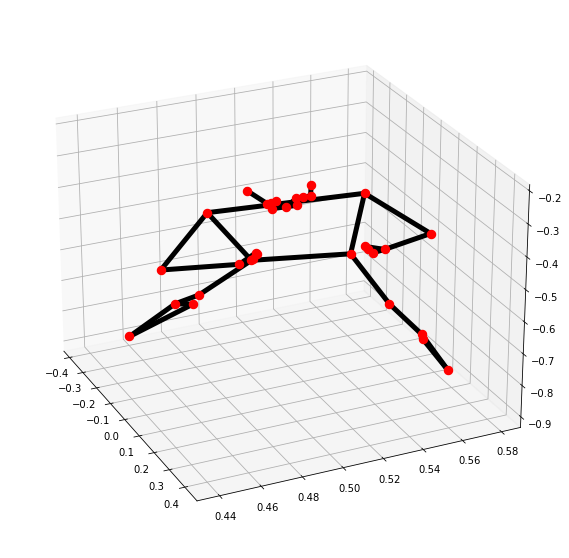

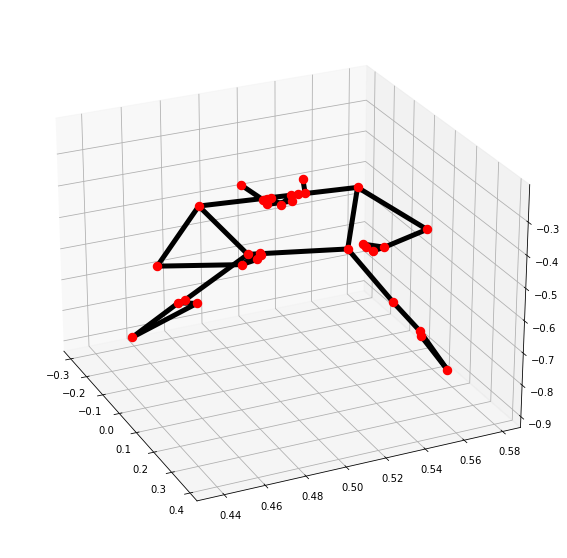

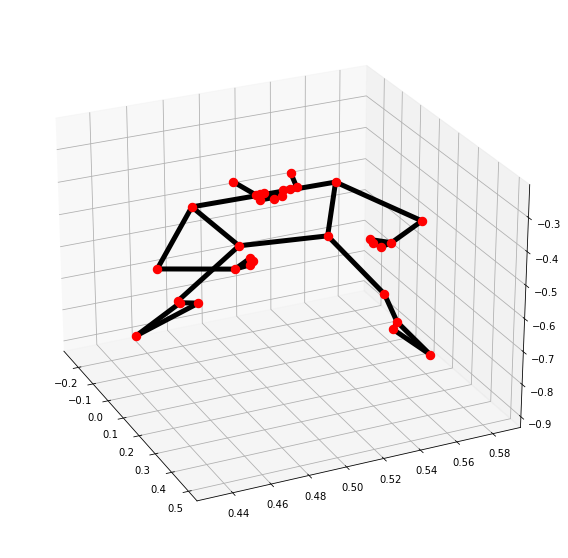

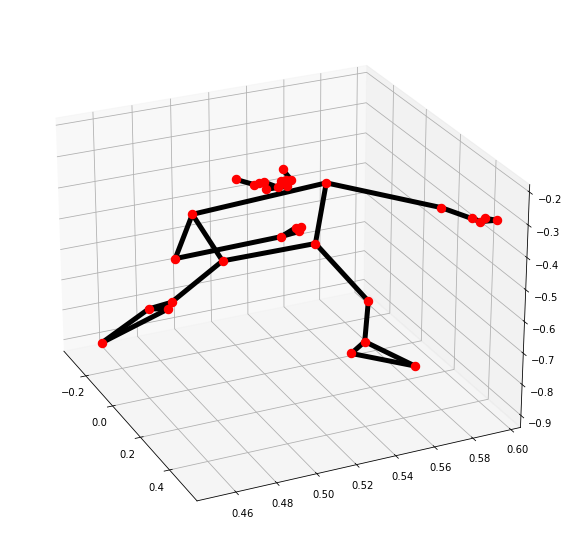

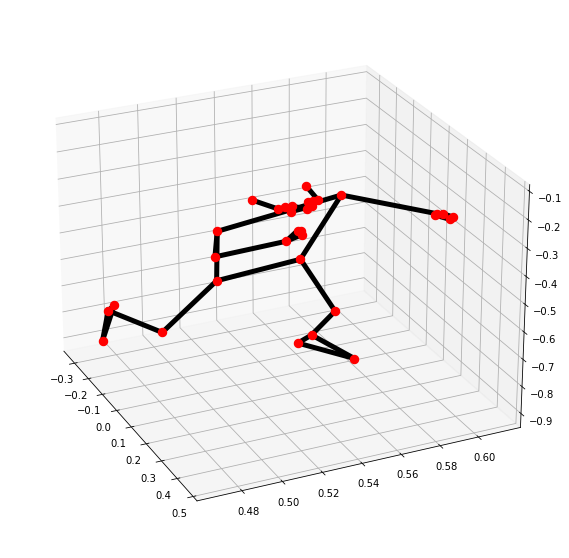

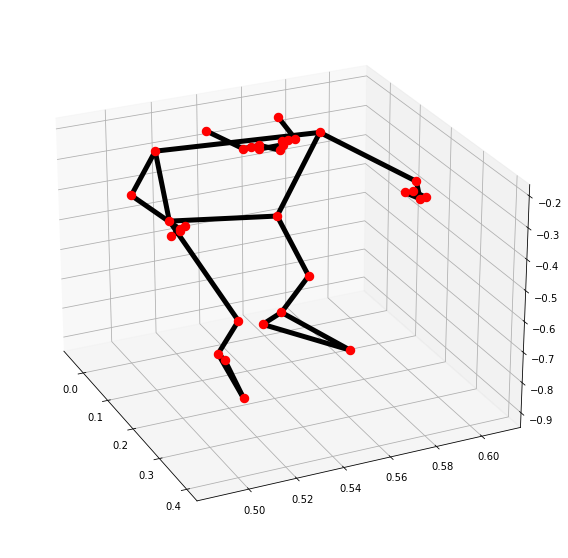

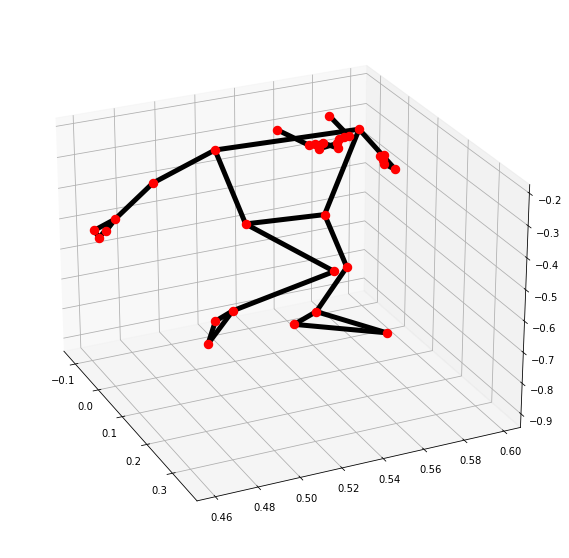

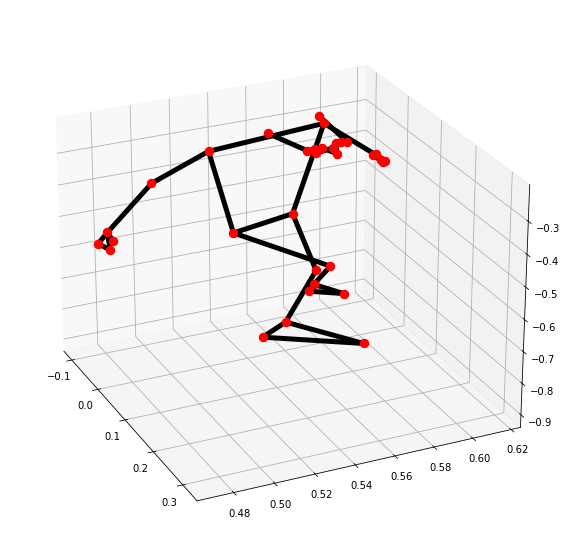

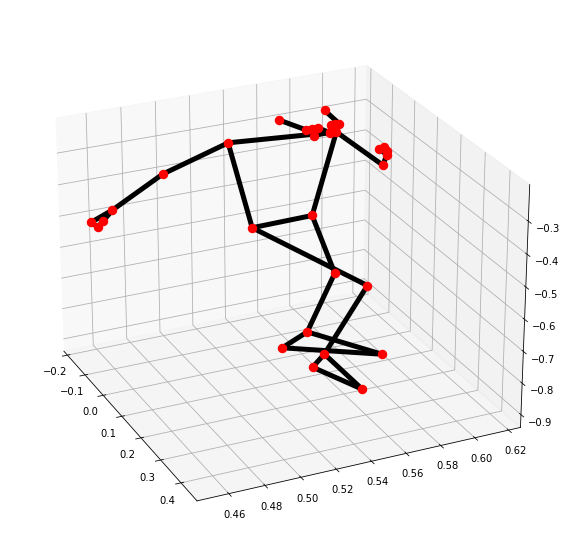

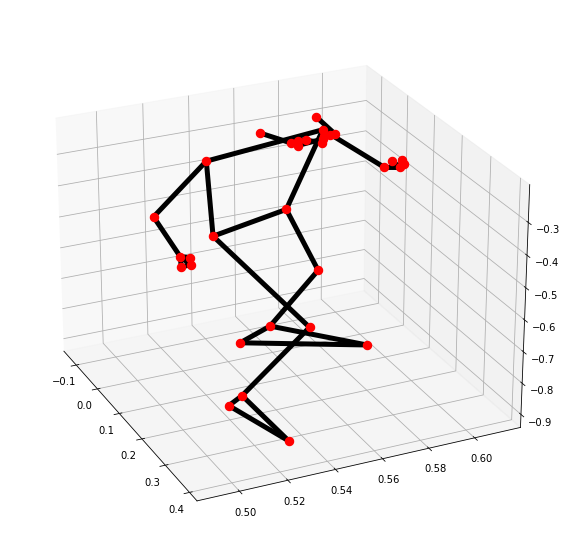

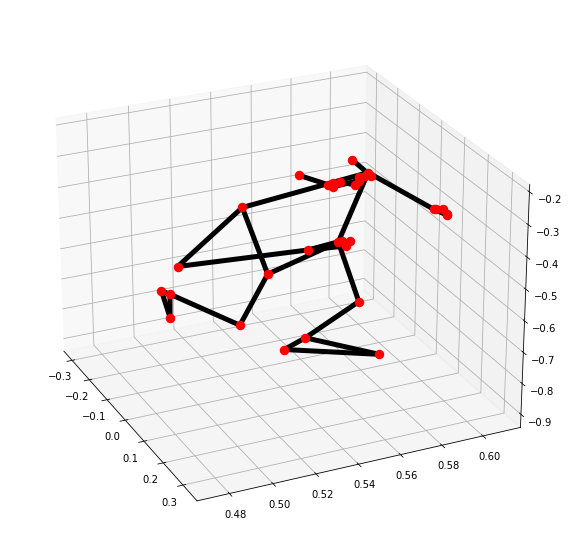

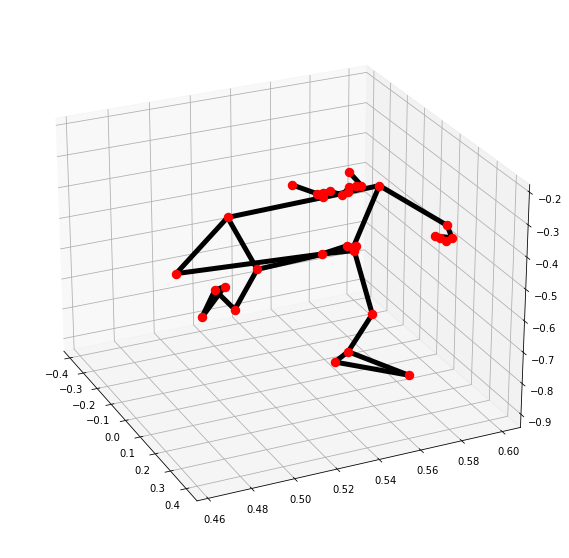

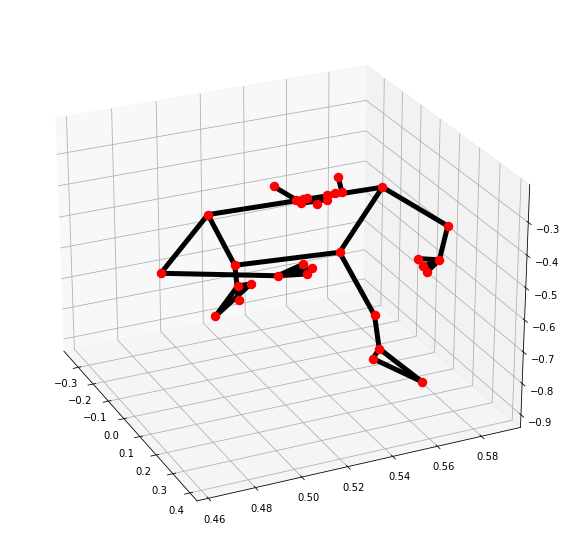

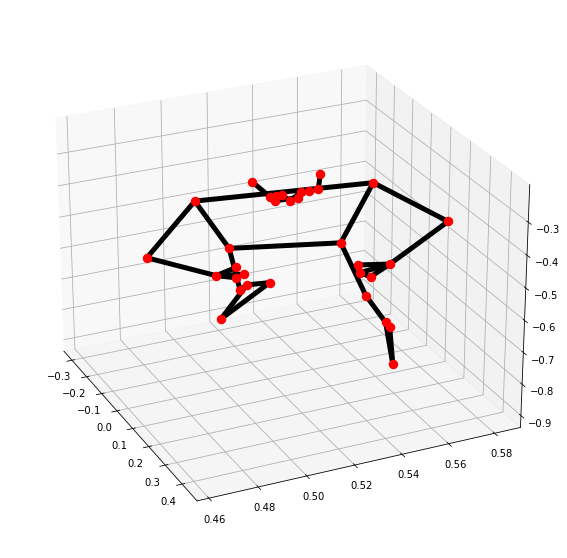

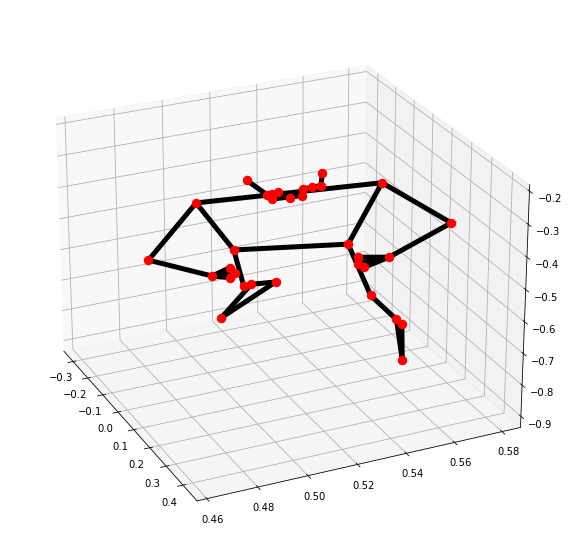

In [10]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=25, azimuth=-25)

### 2D graph view (x, y)

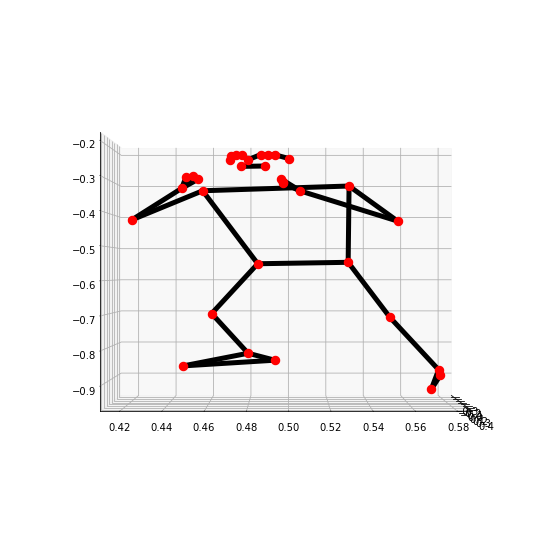

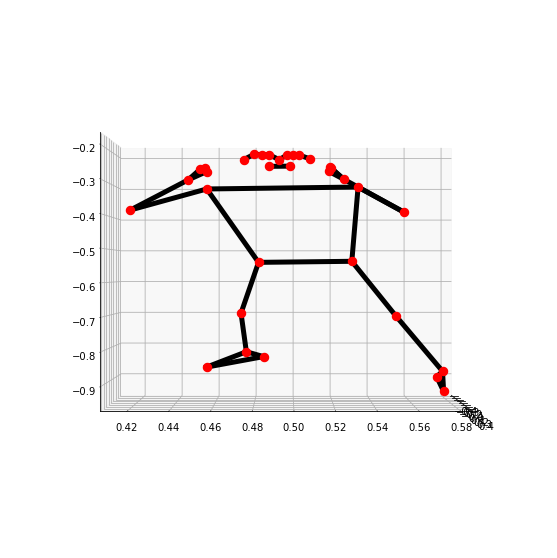

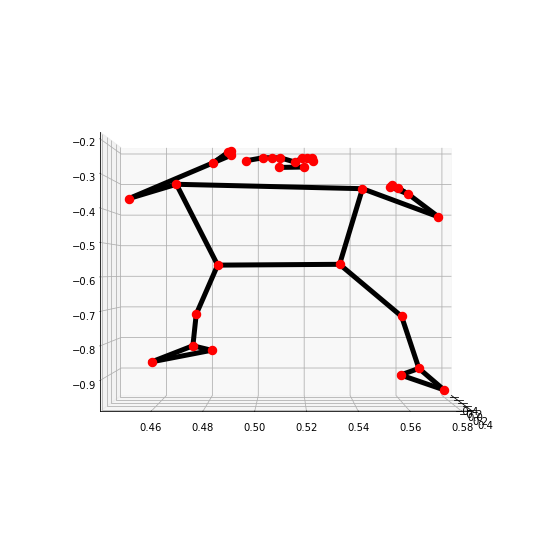

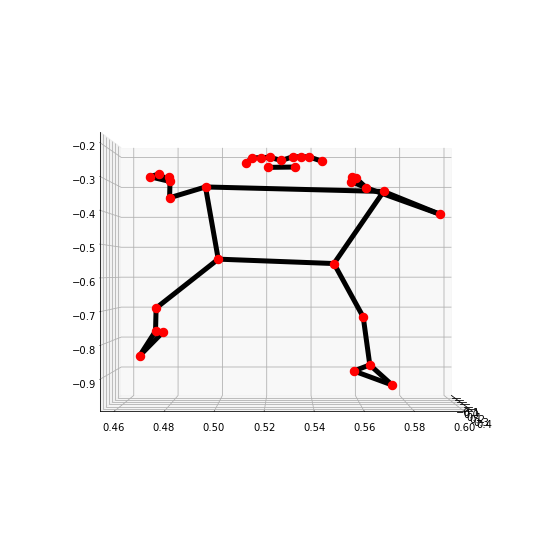

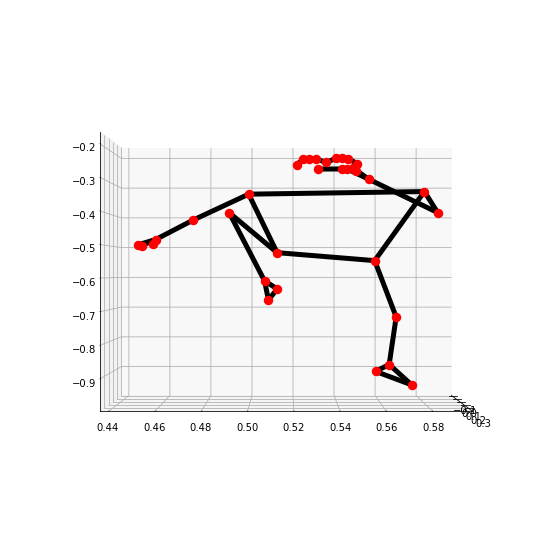

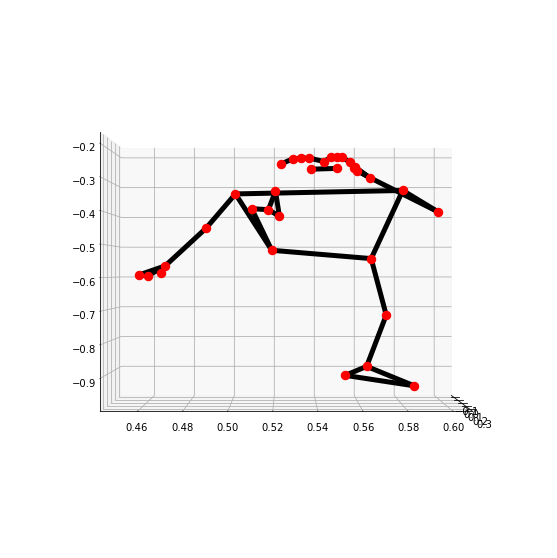

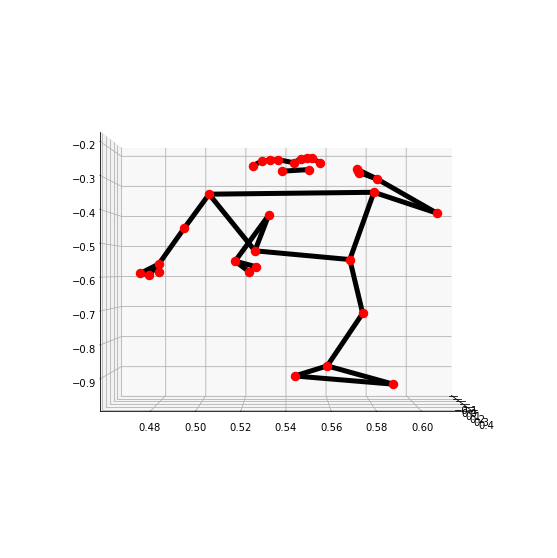

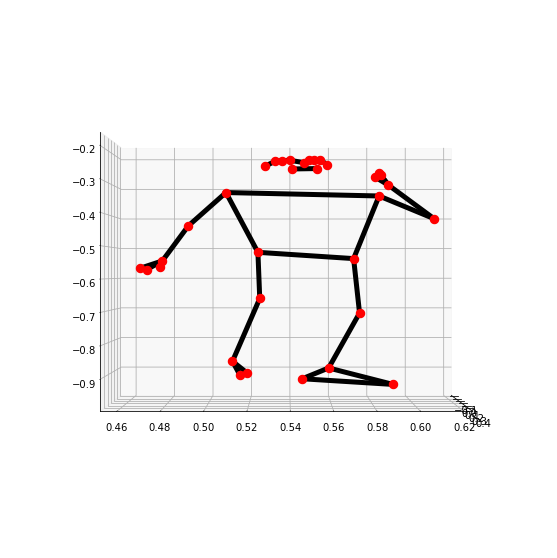

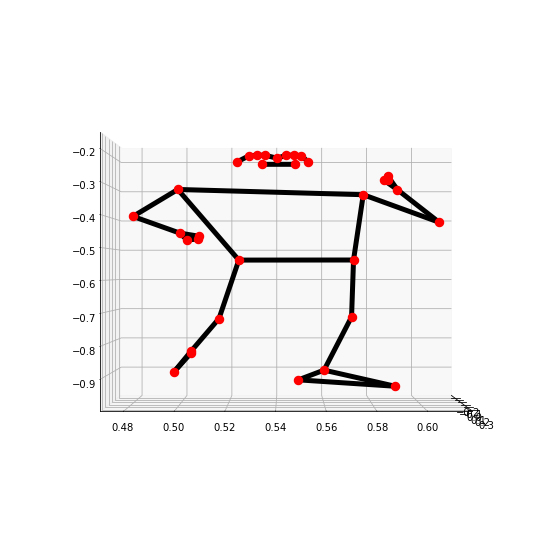

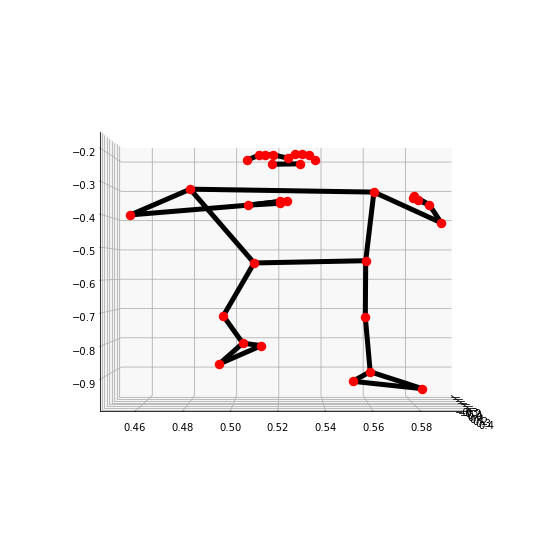

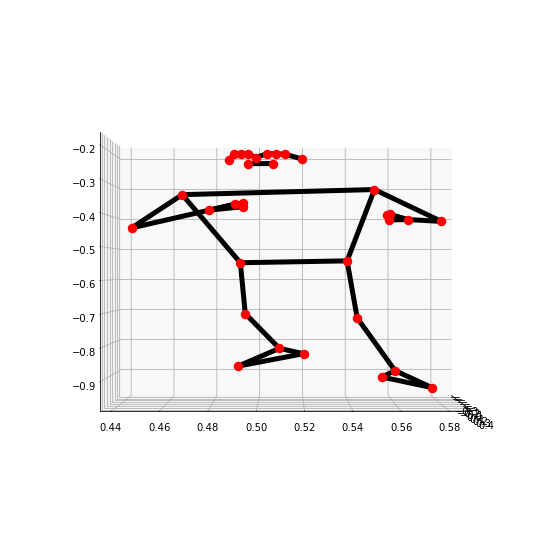

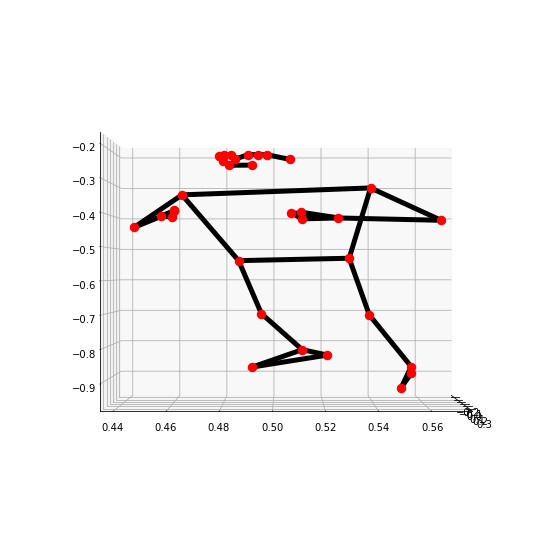

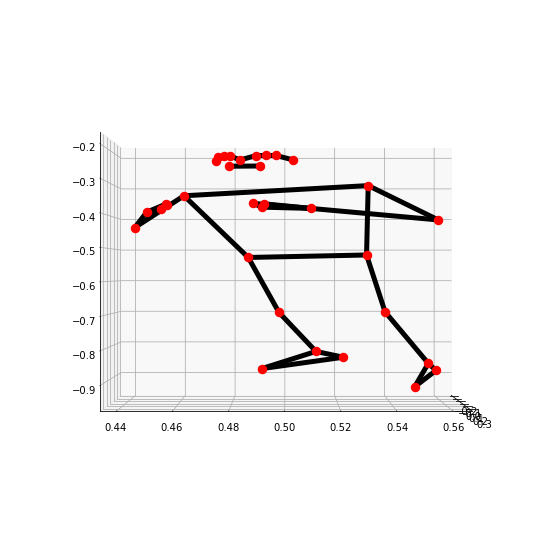

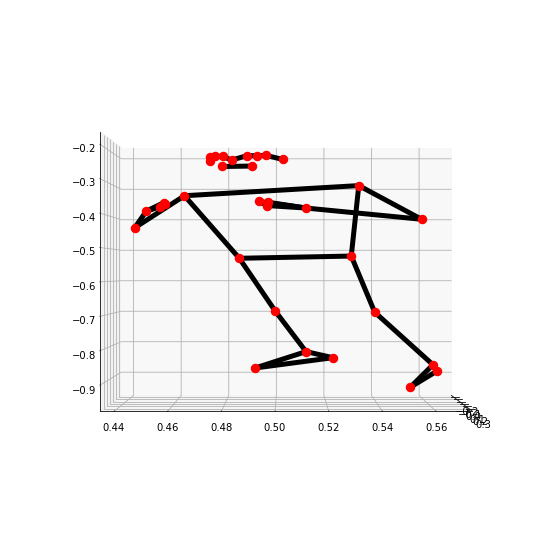

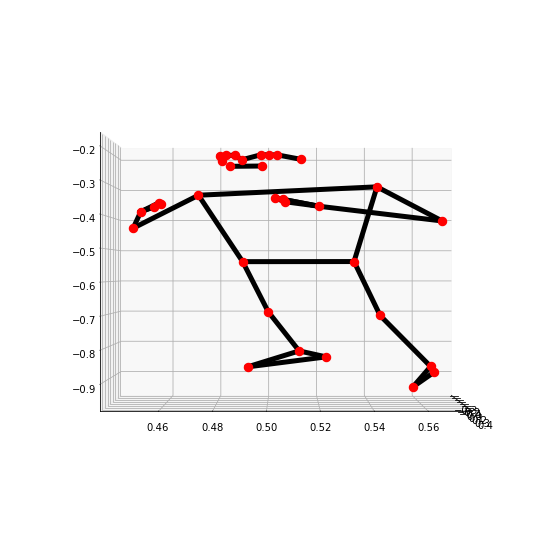

In [107]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### 2D graph view (z, y)

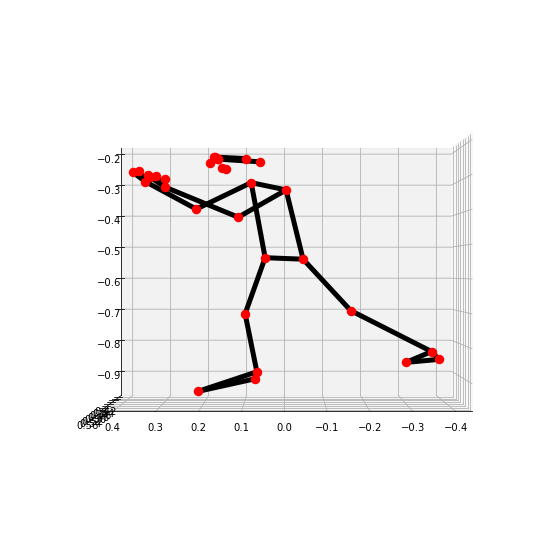

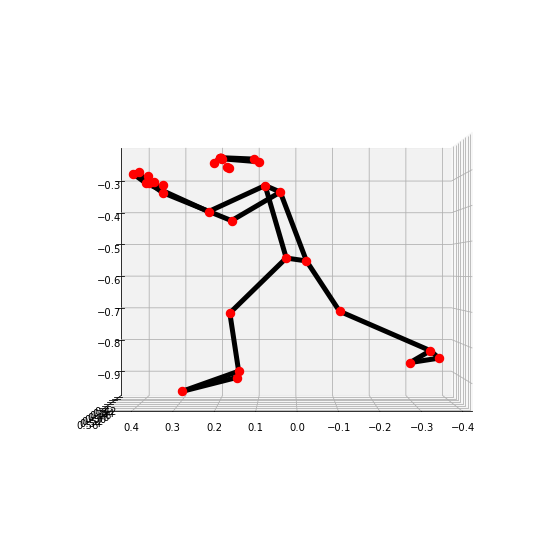

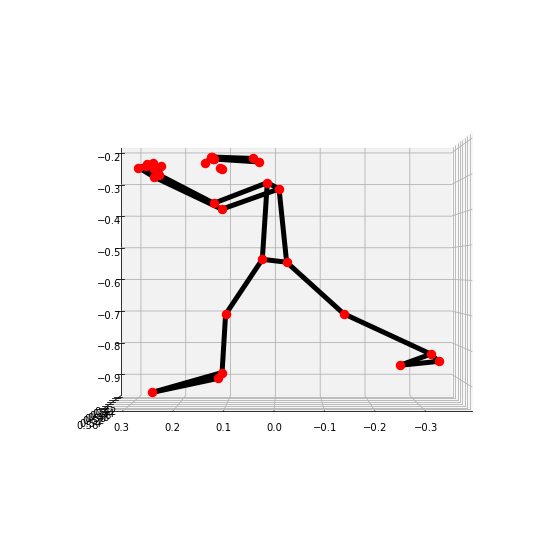

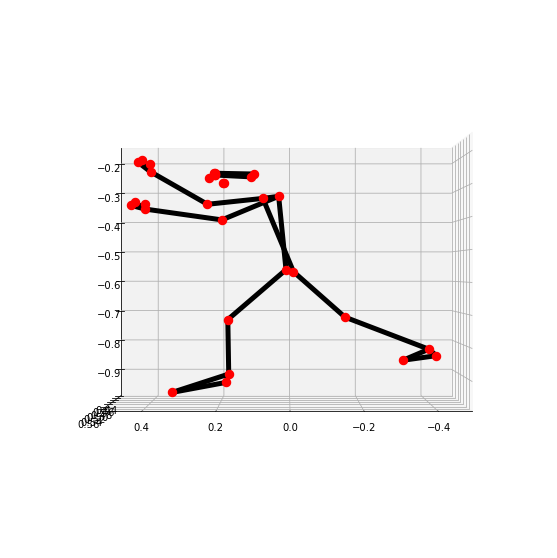

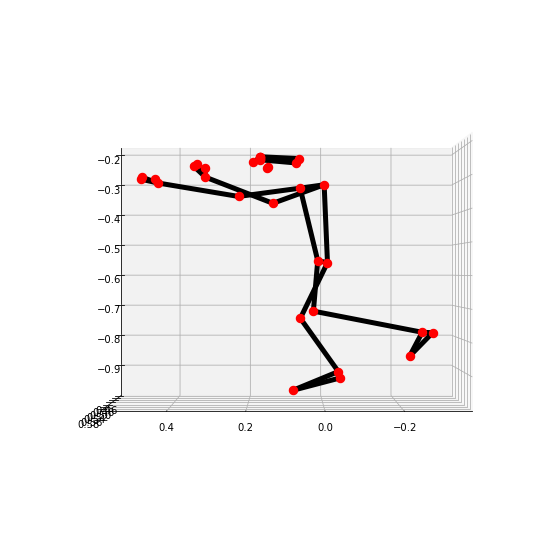

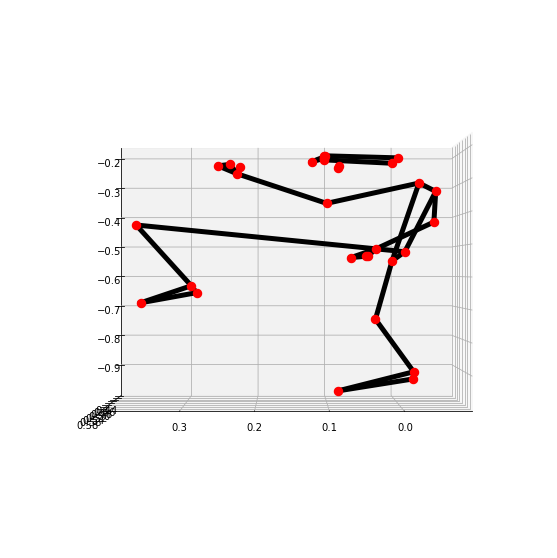

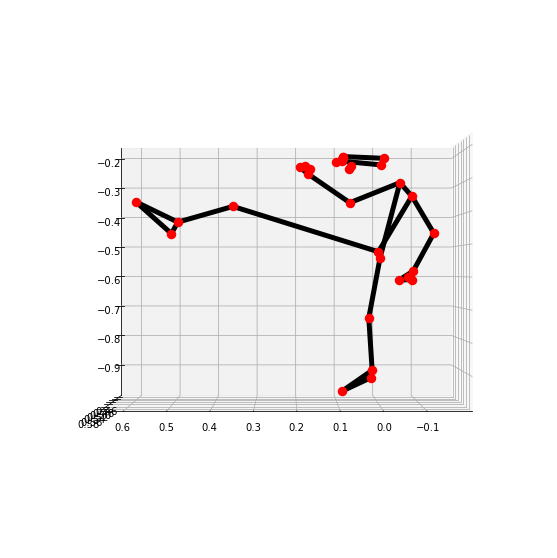

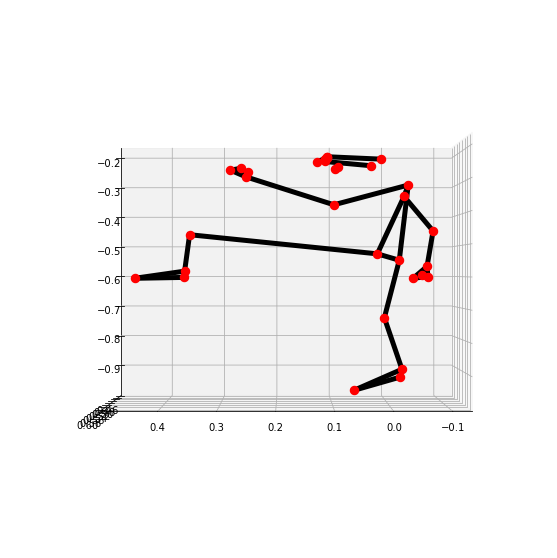

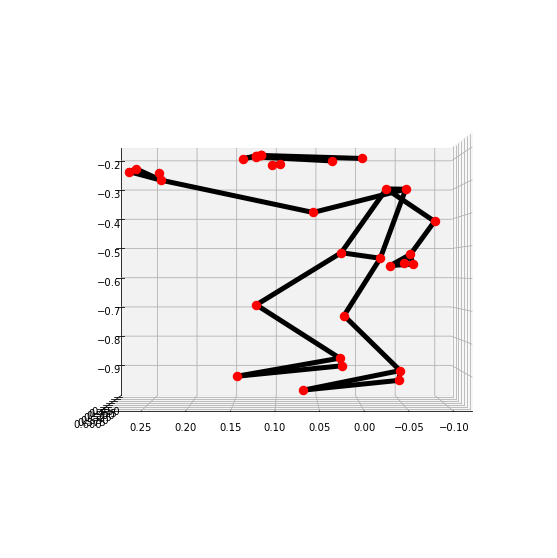

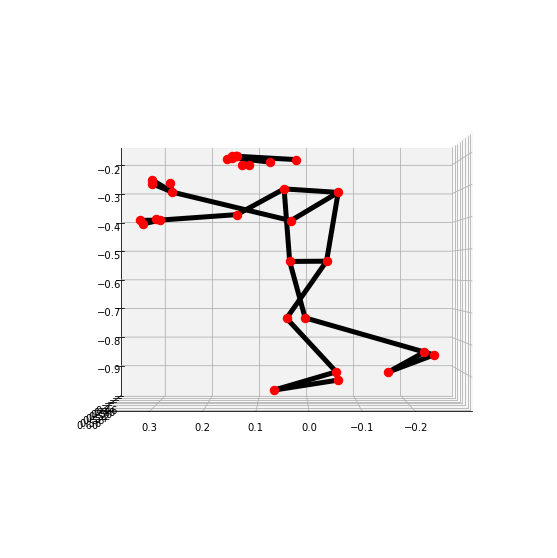

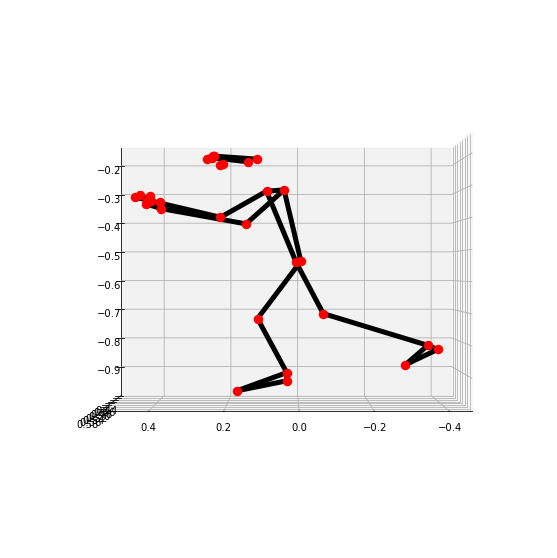

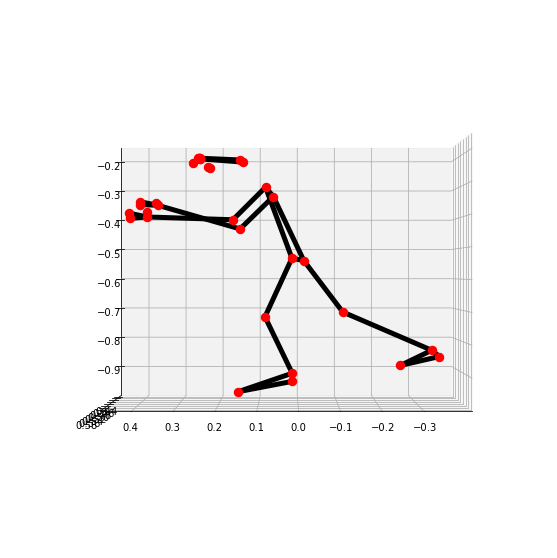

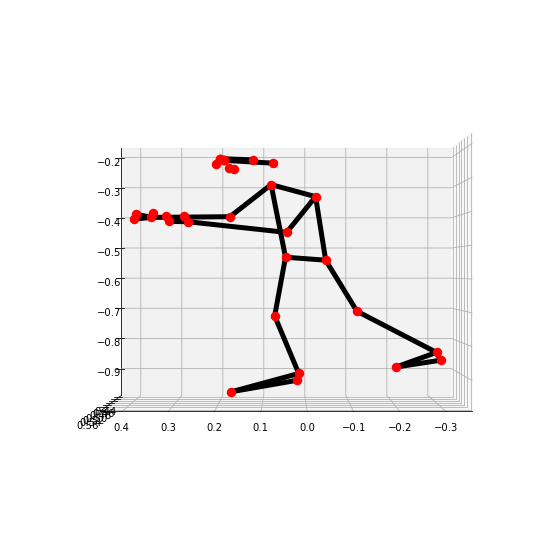

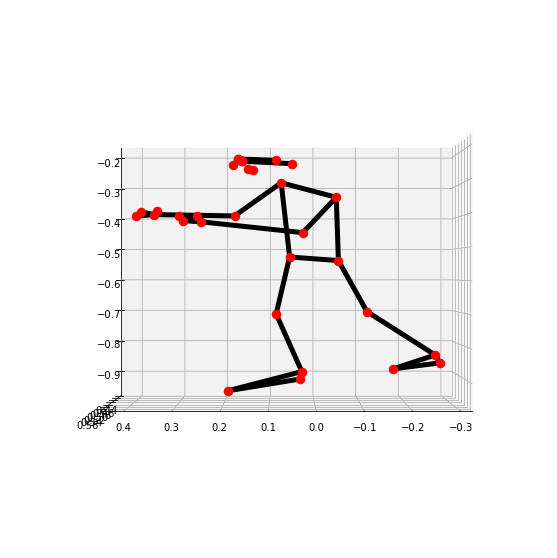

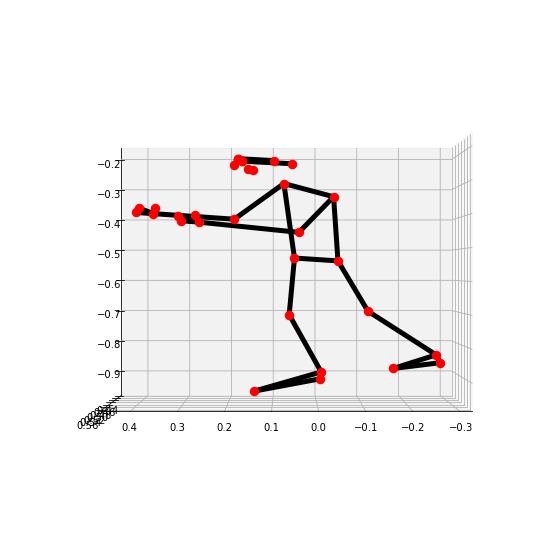

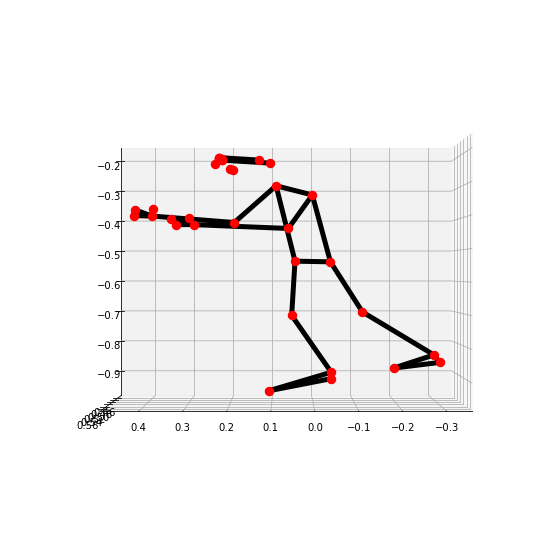

In [14]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=90)

### 2D graph view (x, z)

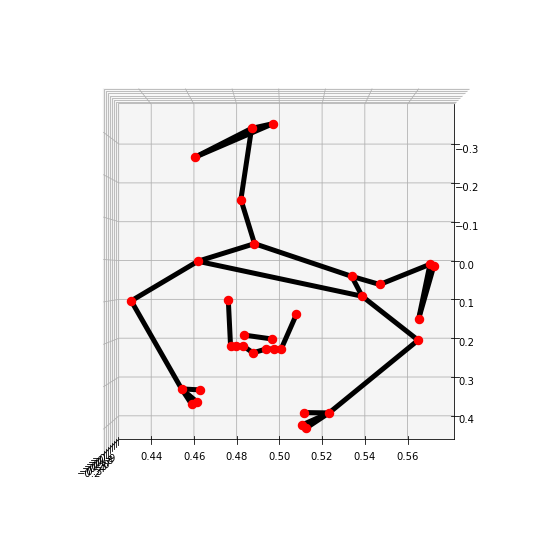

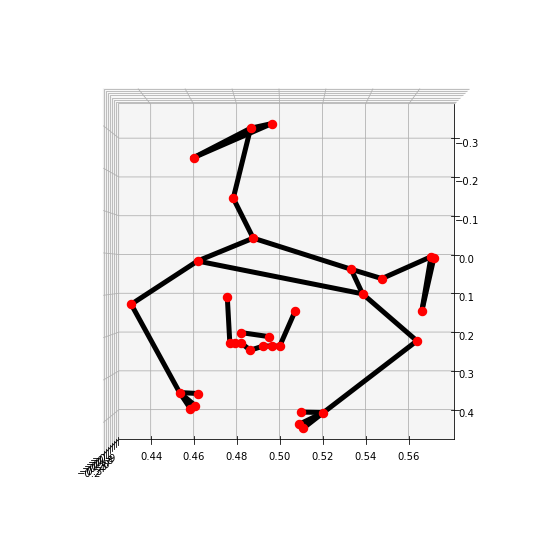

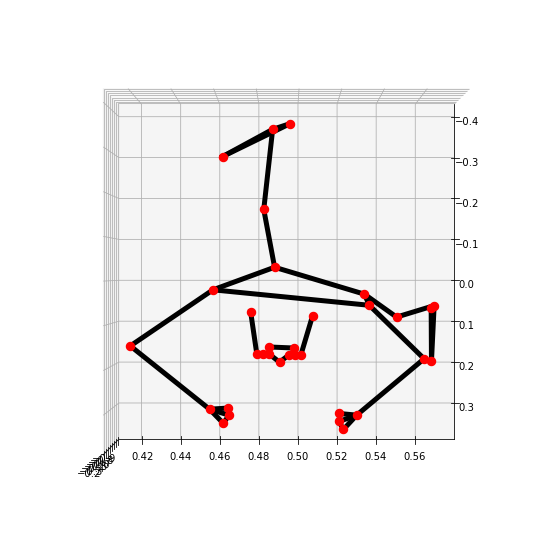

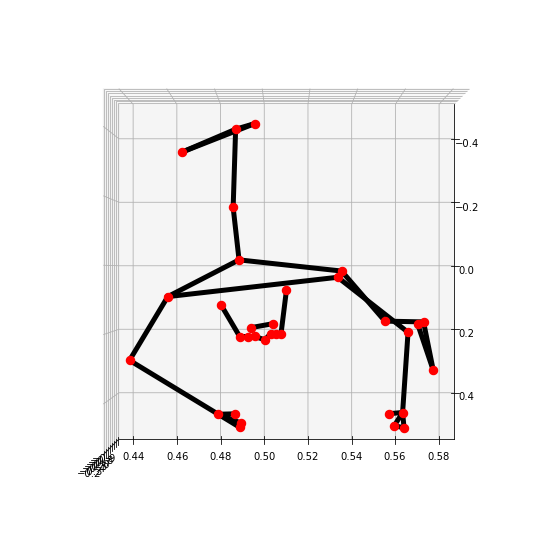

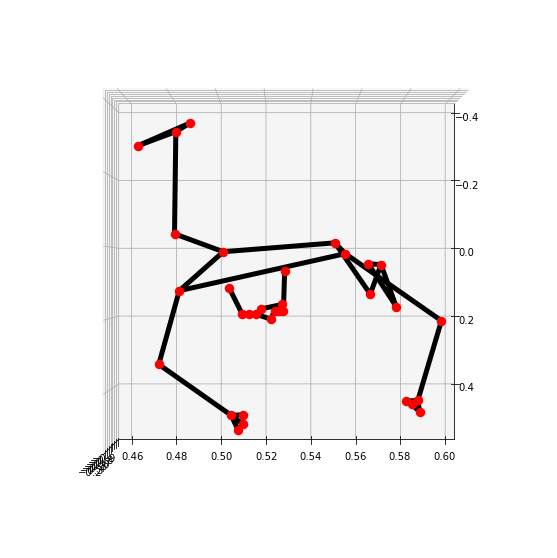

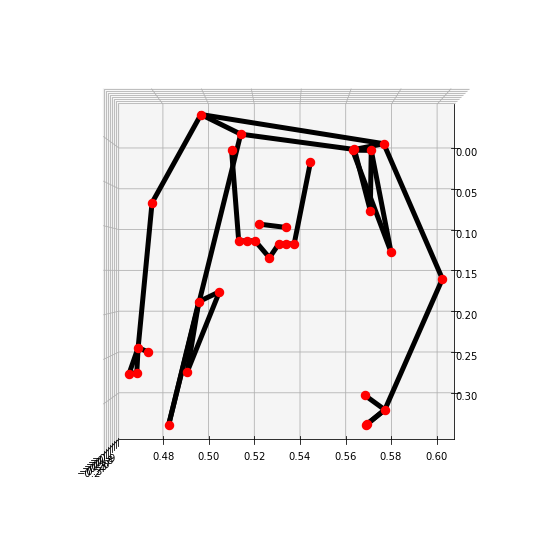

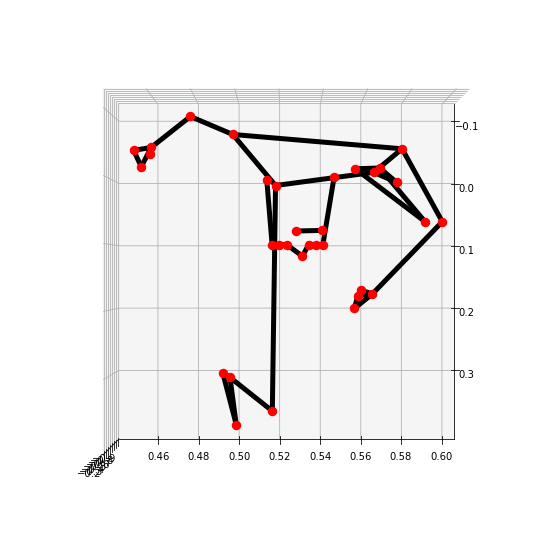

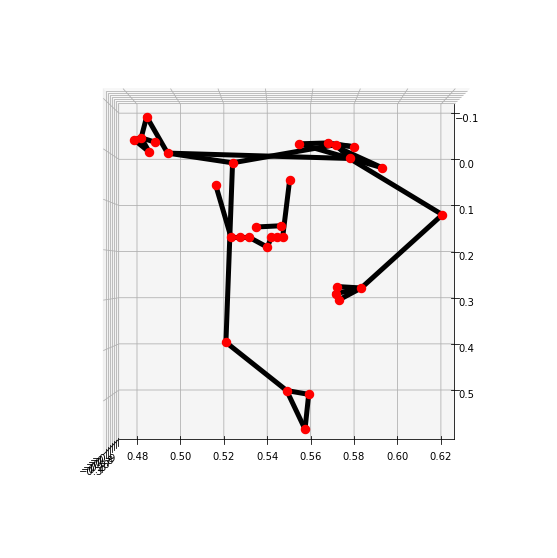

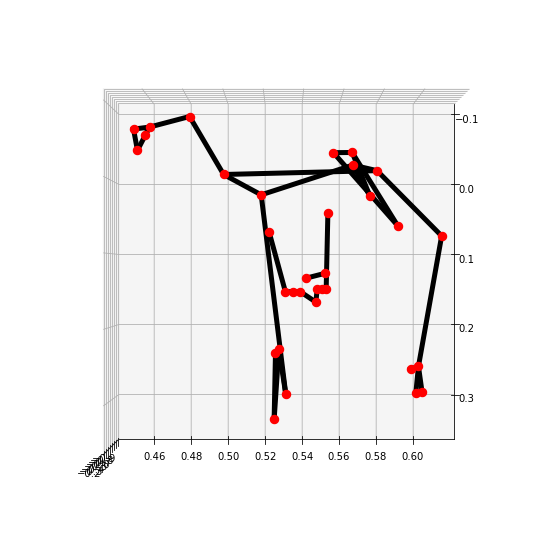

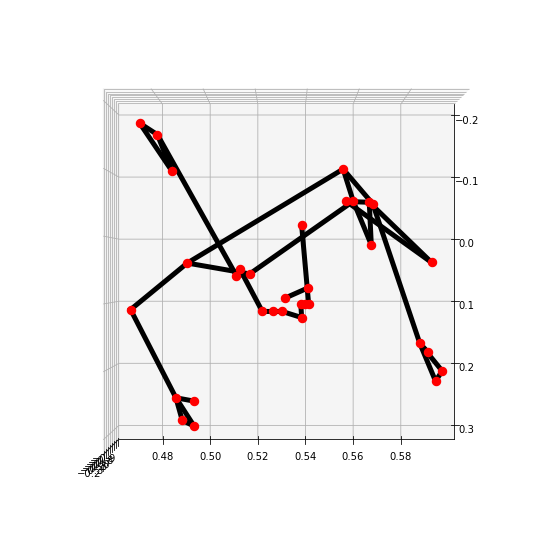

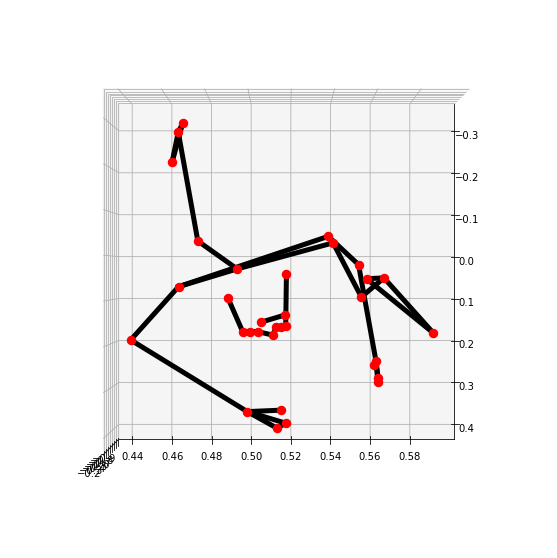

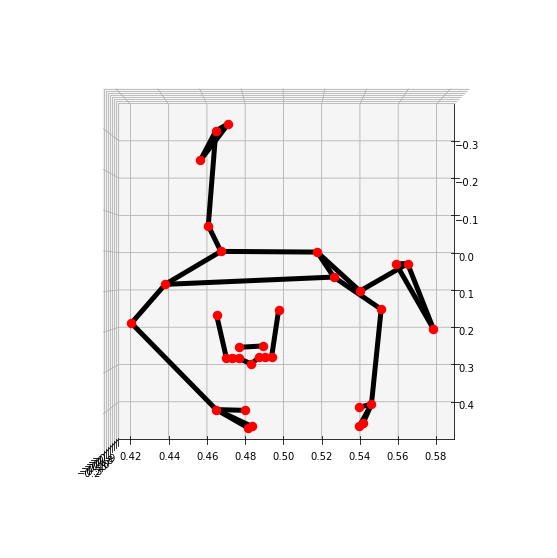

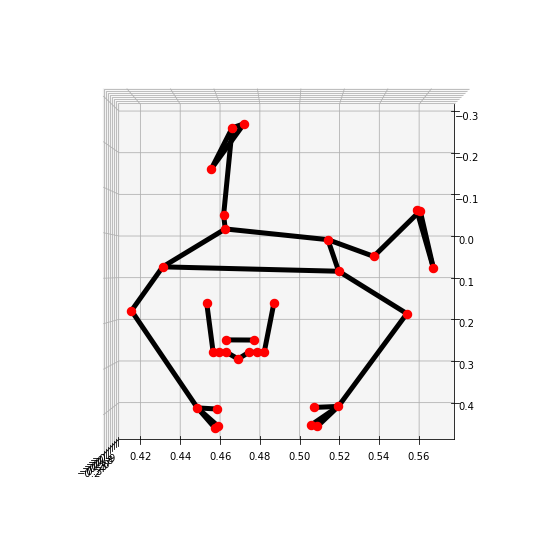

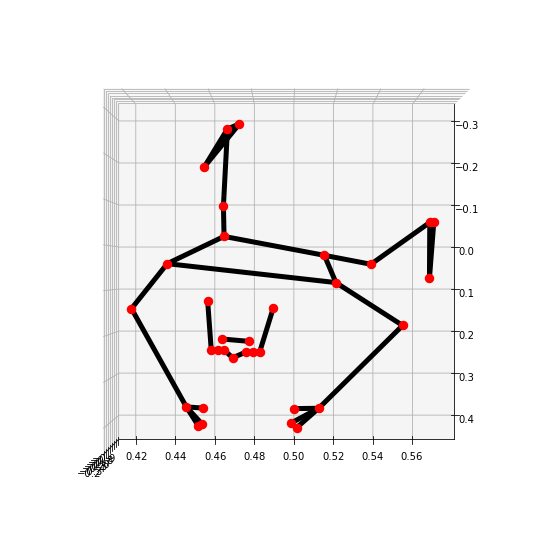

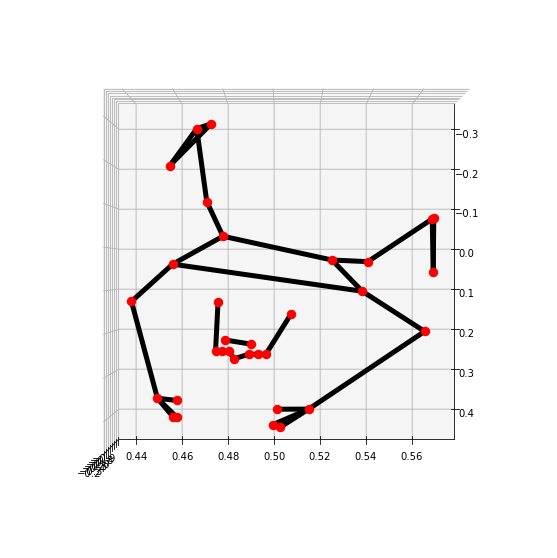

In [6]:
for i in range(len(results_list)):
    mp_drawing.plot_landmarks(results_list[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=90, azimuth=0)

In [15]:
df = pd.read_csv('../new/data/7.csv')
del df['Unnamed: 0']

In [111]:
df2 = df[df['clip_name'] == '7_35']
df2

clip_name  threshold       0_x       0_y       0_z       1_x       1_y  \
525      7_35          4  0.479736  0.242829 -0.206837  0.484638  0.226463   
526      7_35          8  0.487269  0.227901 -0.162003  0.491768  0.214856   
527      7_35         12  0.504556  0.249847 -0.178158  0.508131  0.237840   
528      7_35         16  0.516308  0.231435 -0.165336  0.520458  0.220401   
529      7_35         20  0.517354  0.236916 -0.095168  0.522047  0.221611   
530      7_35         24  0.517635  0.253747 -0.098426  0.521293  0.237601   
531      7_35         28  0.530480  0.249971 -0.037811  0.533678  0.236317   
532      7_35         32  0.536567  0.225021 -0.118302  0.539897  0.214490   
533      7_35         36  0.528102  0.206307 -0.201307  0.531362  0.193139   
534      7_35         40  0.493621  0.197002 -0.291759  0.498568  0.185338   
535      7_35         44  0.465280  0.215069 -0.262808  0.471714  0.200309   
536      7_35         48  0.461847  0.218974 -0.217750  0.468342  0.203244   
537      7_35         52  0.465722  0.218953 -0.227569  0.472179  0.203388   
538      7_35         56  0.488657  0.216878 -0.250319  0.495589  0.200658   
539      7_35         60  0.504151  0.207520 -0.269086  0.511358  0.191637   
540      7_35         64  0.502578  0.210858 -0.275523  0.510168  0.196836   

          1_z       2_x       2_y  ...      29_z      30_x      30_y  \
525 -0.191864  0.487775  0.226698  ... -0.066560  0.488440  0.861665   
526 -0.147956  0.494632  0.214894  ... -0.087942  0.486365  0.861633   
527 -0.160408  0.510427  0.238059  ... -0.095568  0.481716  0.858472   
528 -0.148444  0.523732  0.220135  ...  0.059211  0.471183  0.786793   
529 -0.074879  0.525506  0.220911  ...  0.038613  0.496327  0.654780   
530 -0.081033  0.524686  0.236538  ...  0.012818  0.510099  0.595644   
531 -0.018720  0.536342  0.236128  ...  0.000136  0.499743  0.721542   
532 -0.096213  0.542492  0.215415  ...  0.107374  0.503503  0.906947   
533 -0.183112  0.534528  0.193668  ...  0.070249  0.493545  0.845160   
534 -0.275439  0.501948  0.185300  ...  0.056263  0.481255  0.859177   
535 -0.246179  0.474539  0.200139  ... -0.017970  0.485056  0.872201   
536 -0.204421  0.472110  0.202986  ... -0.033603  0.485897  0.870679   
537 -0.214498  0.475462  0.203227  ...  0.006373  0.486185  0.869872   
538 -0.238564  0.498973  0.200588  ...  0.007913  0.485320  0.872940   
539 -0.256559  0.514729  0.191887  ...  0.016985  0.485355  0.865101   
540 -0.264436  0.514123  0.197520  ... -0.008891  0.488834  0.860697   

         30_z      31_x      31_y      31_z      32_x      32_y      32_z  
525  0.379851  0.566226  0.931573 -0.206630  0.442273  0.879260  0.304596  
526  0.386819  0.570669  0.931648 -0.233876  0.445372  0.878824  0.310331  
527  0.389824  0.573025  0.946367 -0.230547  0.448982  0.882336  0.307564  
528  0.252488  0.572353  0.956025 -0.055220  0.459686  0.869620  0.197636  
529 -0.299313  0.575364  0.960545 -0.062747  0.494020  0.670654 -0.387514  
530 -0.284568  0.580277  0.958734 -0.064470  0.498254  0.588219 -0.353273  
531 -0.288411  0.582848  0.956976 -0.086129  0.492838  0.771804 -0.373046  
532  0.044903  0.582950  0.959220  0.009011  0.507050  0.950643 -0.070502  
533  0.336317  0.576993  0.958921 -0.066424  0.469587  0.901828  0.248704  
534  0.372666  0.577832  0.956631 -0.083416  0.447267  0.900115  0.273070  
535  0.381015  0.562115  0.953265 -0.165432  0.446372  0.904007  0.295081  
536  0.334075  0.561573  0.943884 -0.181128  0.448490  0.900660  0.241905  
537  0.343177  0.562188  0.936493 -0.137267  0.446848  0.896665  0.250973  
538  0.368562  0.562874  0.936113 -0.130326  0.446466  0.892255  0.275360  
539  0.372935  0.564301  0.934468 -0.126312  0.445594  0.878594  0.277891  
540  0.349463  0.566702  0.932933 -0.152166  0.447168  0.878492  0.250226  

[16 rows x 101 columns]

In [18]:
def calAngleXY(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body1)], df.loc[df['threshold'] == threshold, '{}_y'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body2)], df.loc[df['threshold'] == threshold, '{}_y'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body3)], df.loc[df['threshold'] == threshold, '{}_y'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

def calAngleZY(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body1)], df.loc[df['threshold'] == threshold, '{}_y'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body2)], df.loc[df['threshold'] == threshold, '{}_y'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_z'.format(body3)], df.loc[df['threshold'] == threshold, '{}_y'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

def calAngleXZ(df, threshold, body1, body2, body3):
    a = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body1)], df.loc[df['threshold'] == threshold, '{}_z'.format(body1)]])
    b = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body2)], df.loc[df['threshold'] == threshold, '{}_z'.format(body2)]])
    c = np.array([df.loc[df['threshold'] == threshold, '{}_x'.format(body3)], df.loc[df['threshold'] == threshold, '{}_z'.format(body3)]])
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = int(np.abs(radians * 180.0 / np.pi))
    if angle > 180:
        angle = 360 - angle
    
    return angle

In [44]:
calAngleXY(df2, 24, '24', '14', '12')

130

In [46]:
#calAngleZY(df2, 36, 'right_shoulder', 'right_elbow', 'right_wrist')

In [47]:
#calAngleXZ(df2, 36, 'right_shoulder', 'right_elbow', 'right_wrist')

In [112]:
for i in range(4, len(df2)*4+1, 4):
    print("frame: {}, angle: {}".format(i, calAngleXY(df2, i, '12', '24', '26')))

frame: 4, angle: 166
frame: 8, angle: 171
frame: 12, angle: 174
frame: 16, angle: 170
frame: 20, angle: 0
frame: 24, angle: 0
frame: 28, angle: 170
frame: 32, angle: 174
frame: 36, angle: 168
frame: 40, angle: 167
frame: 44, angle: 167
frame: 48, angle: 168
frame: 52, angle: 171
frame: 56, angle: 170
frame: 60, angle: 170
frame: 64, angle: 172


## Test angles area

In [30]:
start = 4
end = 82

beginNode = '26'
middleNode = '24'
endNode = '12'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleXY(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 171.
Angle frame 8 is 170.
Angle frame 12 is 169.
Angle frame 16 is 168.
Angle frame 20 is 172.
Angle frame 24 is 173.
Angle frame 28 is 171.
Angle frame 32 is 179.
Angle frame 36 is 7.
Angle frame 40 is 10.
Angle frame 44 is 34.
Angle frame 48 is 155.
Angle frame 52 is 173.
Angle frame 56 is 171.
Angle frame 60 is 172.
Angle frame 64 is 174.
Angle frame 68 is 174.
Angle frame 72 is 176.
Angle frame 76 is 177.
Angle frame 80 is 178.


In [109]:
start = 4
end = 80

beginNode = '24'
middleNode = '23'
endNode = '25'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleZY(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 98.
Angle frame 8 is 97.
Angle frame 12 is 95.
Angle frame 16 is 22.
Angle frame 20 is 37.
Angle frame 24 is 42.
Angle frame 28 is 78.
Angle frame 32 is 60.
Angle frame 36 is 112.
Angle frame 40 is 123.
Angle frame 44 is 120.
Angle frame 48 is 97.
Angle frame 52 is 87.
Angle frame 56 is 103.
Angle frame 60 is 103.
Angle frame 64 is 94.
Angle frame 68 is 155.
Angle frame 72 is 81.
Angle frame 76 is 89.


In [76]:
start = 4
end = 84

beginNode = '14'
middleNode = '12'
endNode = '24'

for i in range(start, end, 4):
    print("Angle frame {} is {}.".format(i, calAngleXZ(df2, i, beginNode, middleNode, endNode)))

Angle frame 4 is 166.
Angle frame 8 is 167.
Angle frame 12 is 154.
Angle frame 16 is 177.
Angle frame 20 is 3.
Angle frame 24 is 169.
Angle frame 28 is 156.
Angle frame 32 is 154.
Angle frame 36 is 146.
Angle frame 40 is 130.
Angle frame 44 is 127.
Angle frame 48 is 172.
Angle frame 52 is 167.
Angle frame 56 is 164.
Angle frame 60 is 166.
Angle frame 64 is 179.
Angle frame 68 is 138.
Angle frame 72 is 156.
Angle frame 76 is 168.


TypeError: only size-1 arrays can be converted to Python scalars

In [7]:
class MuayThai:
    def __init__(self, path_clip_name, data, step, true_steps, cal_steps):
        self.path_clip_name = path_clip_name
        self.data = data
        self.step = step
        self.true_steps = true_steps
        self.cal_steps = cal_steps

    def get_data_size(self):
        return len(self.data)

    def cal_angle_xy(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def cal_angle_yz(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_y'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def cal_angle_xz(self, threshold, body1, body2, body3):
        a = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body1)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body1)]])
        b = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body2)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body2)]])
        c = np.array([self.data.loc[self.data['threshold'] == threshold, '{}_x'.format(body3)],
                      self.data.loc[self.data['threshold'] == threshold, '{}_z'.format(body3)]])

        radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
        angle = int(np.abs(radians * 180.0 / np.pi))
        if angle > 180:
            angle = 360 - angle

        return angle

    def find_angles_sub_step(self, step_data, threshold):
        angles = []
        for sub_step in range(1, len(step_data)+1):
            filt = (step_data['sub_step'] == sub_step)
            axis = step_data.loc[filt, 'axis'].iloc[0]

            if axis == 'xy':
                angles.append(self.cal_angle_xy(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
            elif axis == 'yz':
                angles.append(self.cal_angle_yz(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
            elif axis == 'xz':
                angles.append(self.cal_angle_xz(threshold, step_data.loc[filt, 'begin_node'].iloc[0],
                                step_data.loc[filt, 'main_node'].iloc[0],
                                step_data.loc[filt, 'end_node'].iloc[0]))
        return angles

    #return boolean
    def check_sub_step(self, ans_step_data, angles):
        checked_sub_step = 0
        for sub_step in range(1, len(ans_step_data)+1):
            filt = (ans_step_data['sub_step'] == sub_step)
            compared = eval('{} {} {}'.format(angles[sub_step-1], ans_step_data.loc[filt, 'operator'].iloc[0],
                                        ans_step_data.loc[filt, 'true_angle'].iloc[0]))
            #print(ans_step_data)
            if compared:
                checked_sub_step += 1
        return checked_sub_step == len(ans_step_data)

    def check(self):
        point = 0
        curr_step = 1
        thresholds = self.data['threshold'].tolist()
        step_correct = []

        for i in range(len(thresholds)):
            threshold = thresholds[i]
            all_angles = []

            #Find angles for every step
            for step in range(curr_step, self.step+1):
                curr_step_data = self.cal_steps[self.cal_steps['step'] == step]
                angle = self.find_angles_sub_step(curr_step_data, threshold)
                #print(angle)
                all_angles.append(angle)
            step_round = 0
            #Compare angles for every step
            for step in range(curr_step, self.step+1):
                curr_ans_step_data = self.true_steps[self.true_steps['step'] == step]
                if self.check_sub_step(curr_ans_step_data, all_angles[step_round]):
                    step_correct.append(threshold)
                    point += 1
                    curr_step = step+1
                    print('Frame: {}, True angle: {}'.format(int(threshold), all_angles[step_round]))
                    print('Current point: {}'.format(point))
                    break
                step_round += 1
                
            #print(all_angles)

            if point == self.step:
                break

        return point, step_correct

    def get_landmarks(self):
        cap = cv2.VideoCapture(self.path_clip_name)
        frameTime = 1
        threshold = 0
        results_list = []
        diff = 4

        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while cap.isOpened():
                threshold += 1

                showed, frame = cap.read()
                if showed:
                    frame = cv2.resize(frame, (1920, 1080))

                    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    img.flags.writeable = False

                    results = holistic.process(img)

                    try:
                        landmarks = results.pose_landmarks.landmark
                    except:
                        pass

                    img.flags.writeable = True
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                    if threshold % diff == 0:
                        #cv2.imshow('Mediapipe Feed', img)
                        results_list.append(results)

                    if cv2.waitKey(frameTime) & 0xFF == ord('q'):
                        break
                else:
                    break

            cap.release()
            cv2.destroyAllWindows()
            
        return results_list

    def show_true_graph(self, landmarks, true_answer_index):
        for i in range(len(true_answer_index)):
            mp_drawing.plot_landmarks(landmarks[true_answer_index[i]].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

## 6.ตาเถรค้ำพัก

In [15]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '23', 'true_angle': 90, 'operator': '<'},
{'step': 3, 'sub_step': 1, 'main_node': '13', 'true_angle': 125, 'operator': '<='},
{'step': 3, 'sub_step': 2, 'main_node': '11', 'true_angle': 80, 'operator': '>'},
{'step': 3, 'sub_step': 3, 'main_node': '14', 'true_angle': 90, 'operator': '<='},
{'step': 3, 'sub_step': 4, 'main_node': '12', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 2, 'main_node': '12', 'true_angle': 90, 'operator': '>'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '24', 'main_node': '23', 'end_node': '25' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'yz'},
{'step': 3, 'sub_step': 3, 'begin_node': '12', 'main_node': '14', 'end_node': '22' , 'axis': 'xy'},
{'step': 3, 'sub_step': 4, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'xy'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 4, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'}])

### Test class

In [7]:
df = pd.read_csv('../new/data/6.csv')
del df['Unnamed: 0']

In [8]:
clip_name = 20
m2 = MuayThai('../new/6/{}.MOV'.format(clip_name), df[df['clip_name'] == '6_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [9]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [9, 20]
Current point: 1
Frame: 20, True angle: [4]
Current point: 2
Frame: 36, True angle: [106, 108, 72, 16]
Current point: 3
Frame: 48, True angle: [114, 114]
Current point: 4


4

In [10]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [11]:
landmarks = m2.get_landmarks()

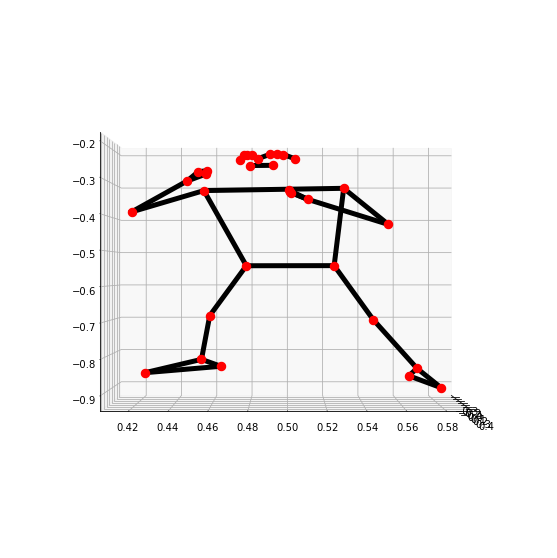

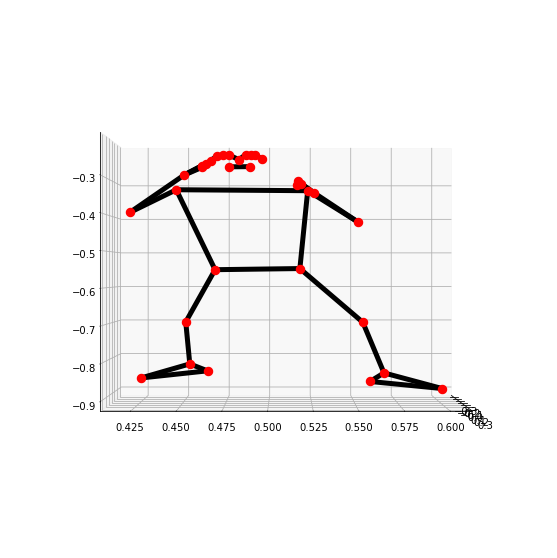

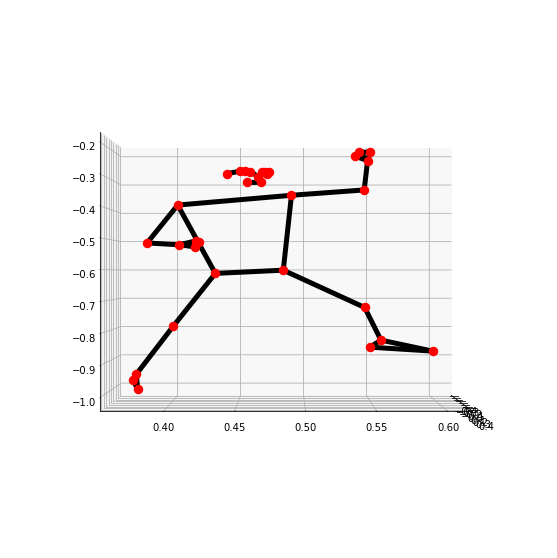

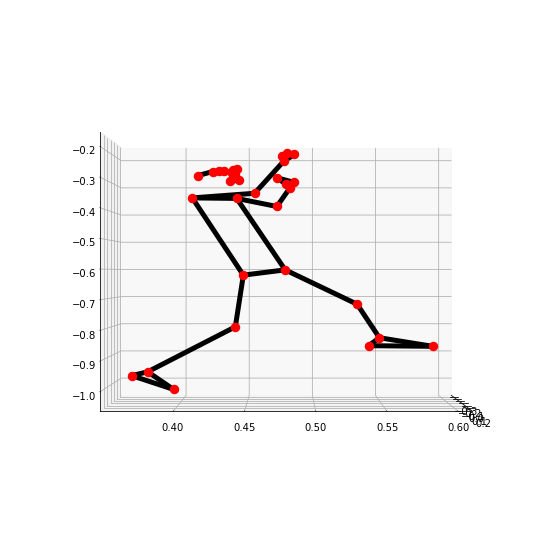

In [12]:
m2.show_true_graph(landmarks, true_step_frame_index)

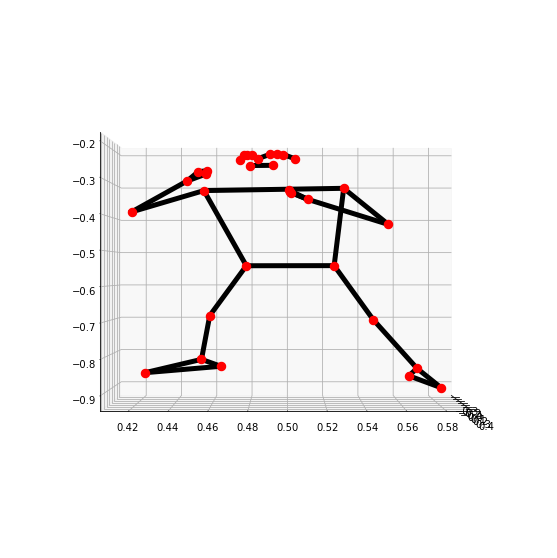

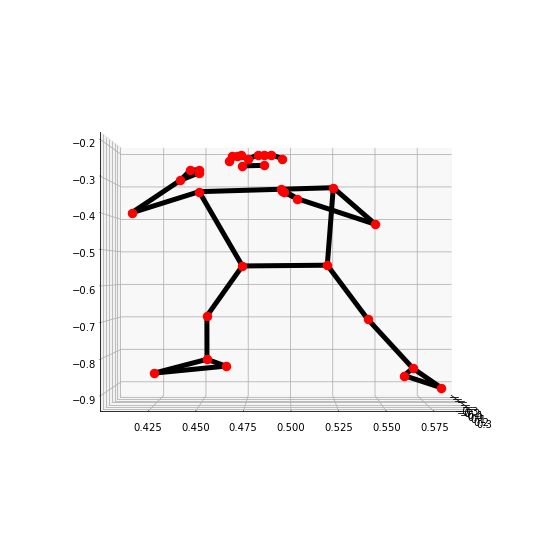

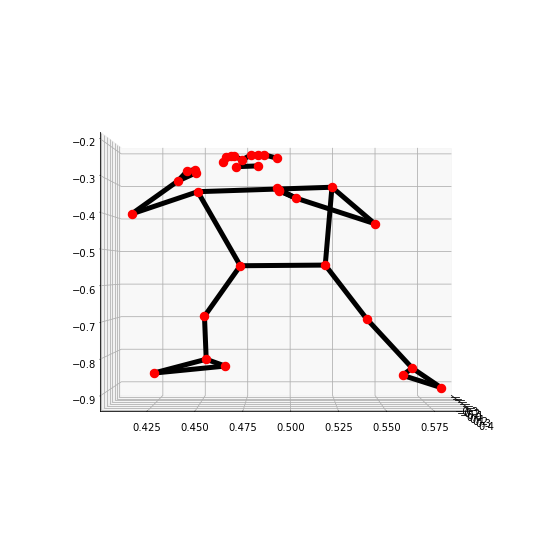

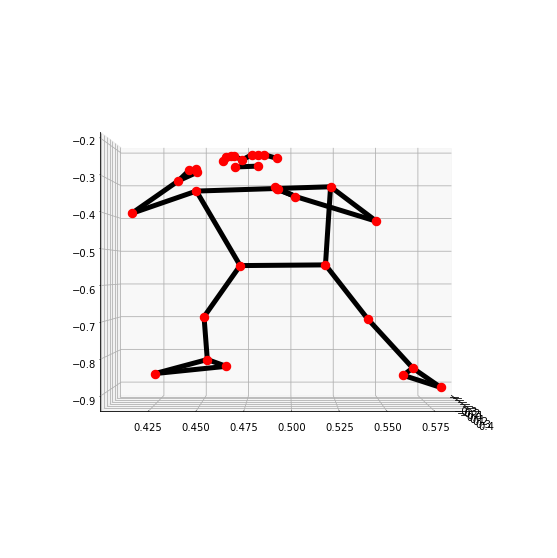

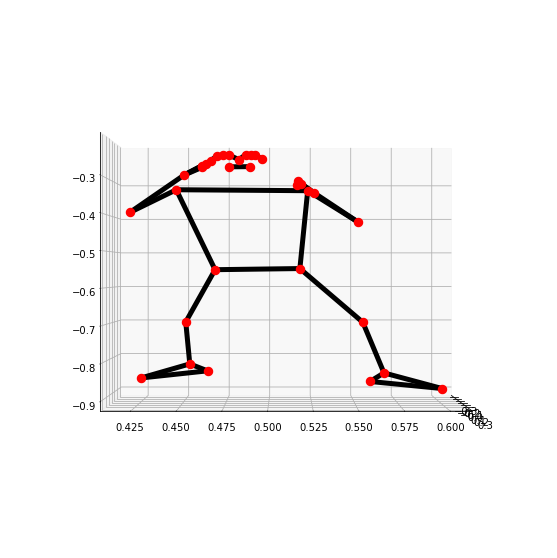

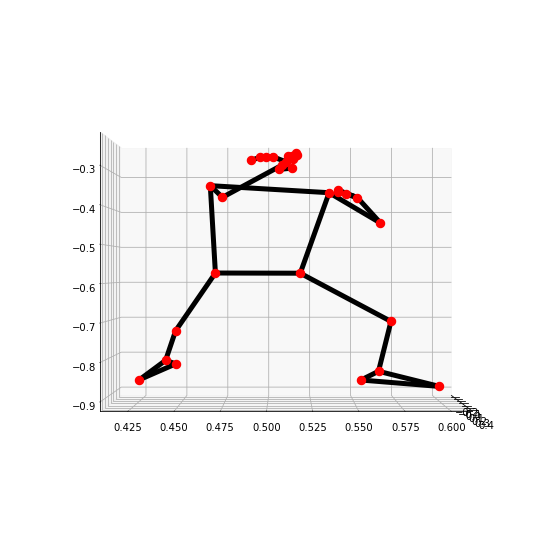

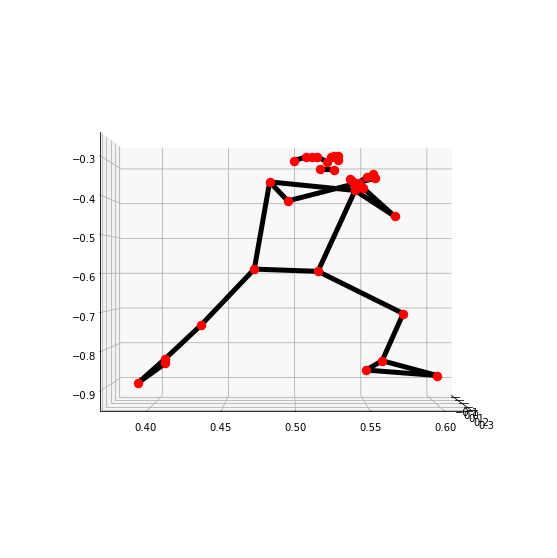

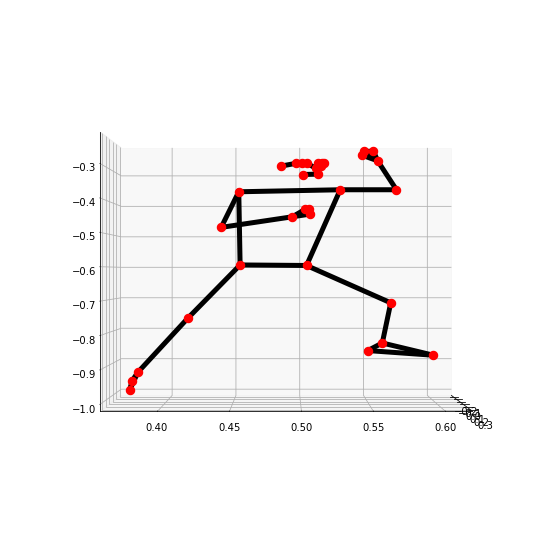

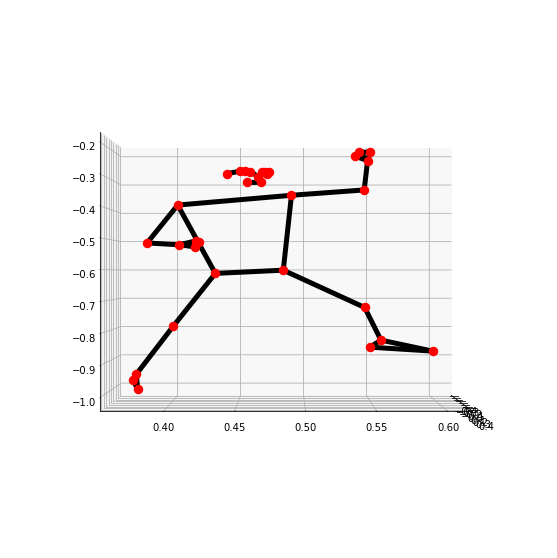

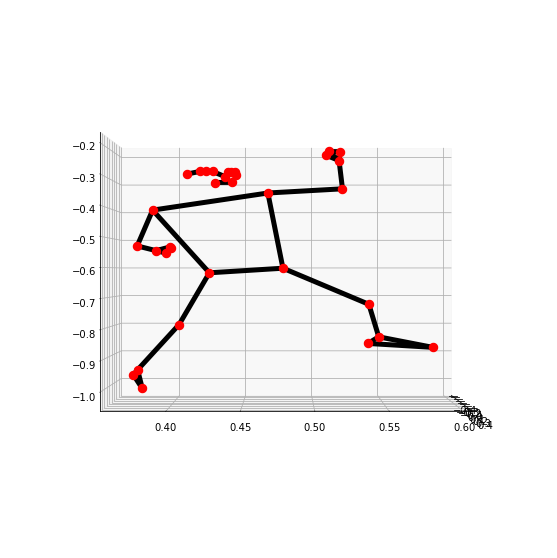

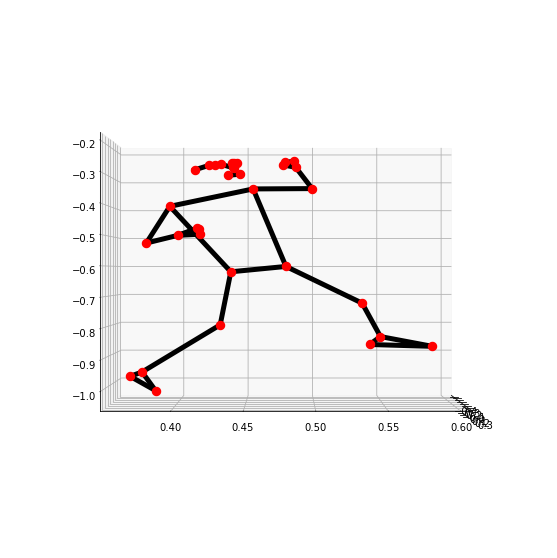

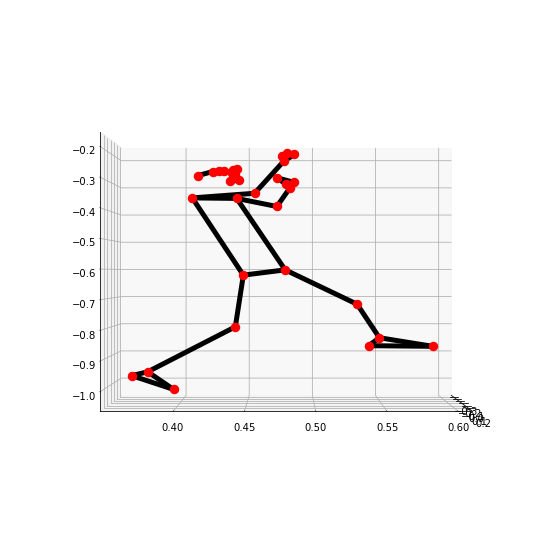

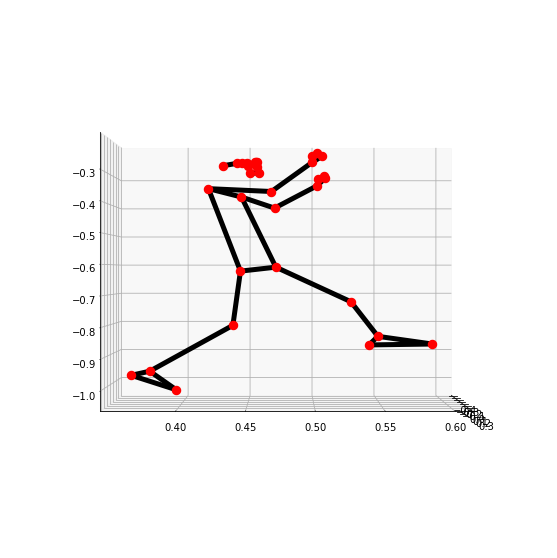

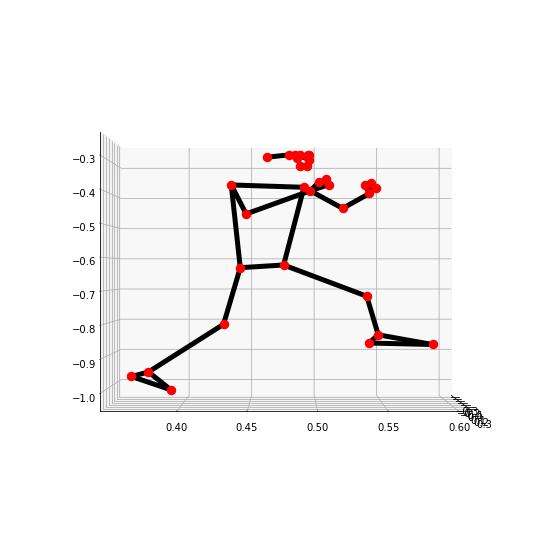

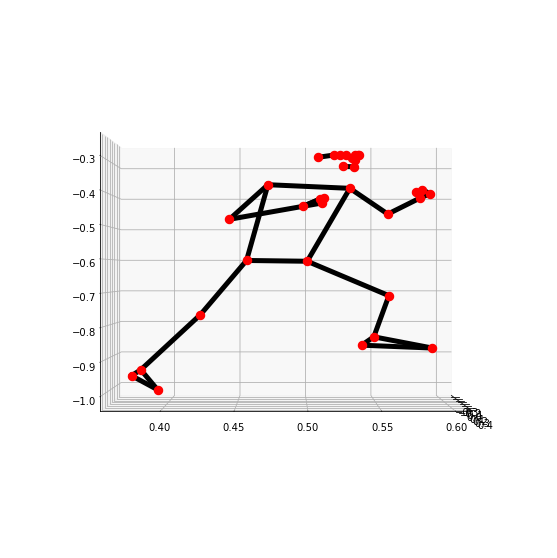

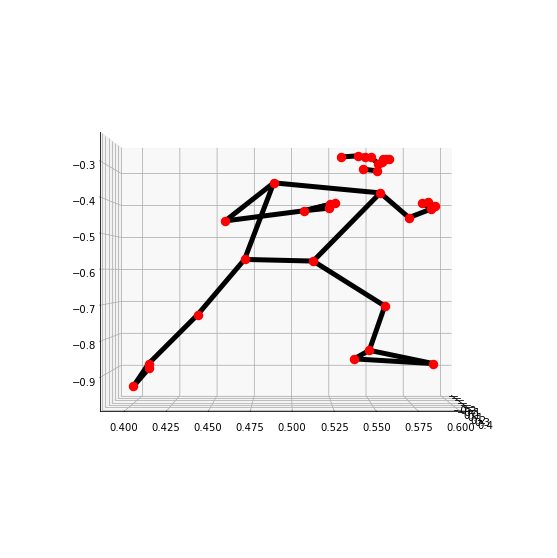

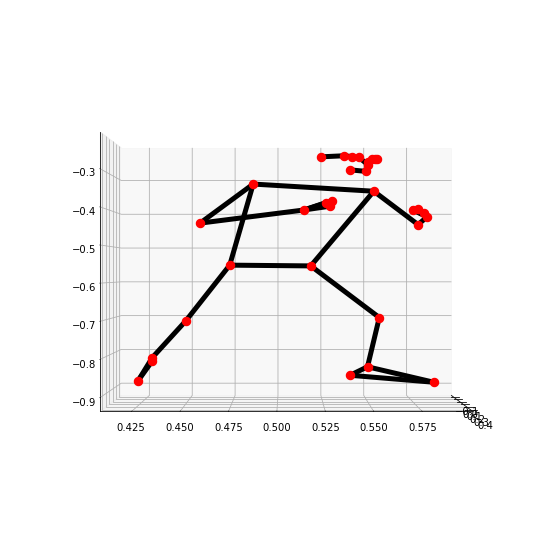

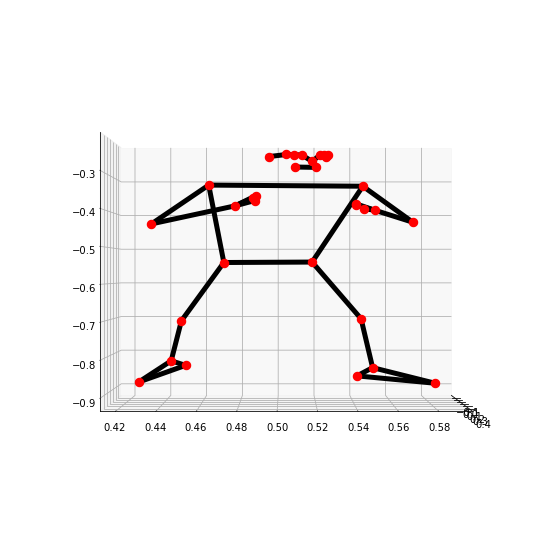

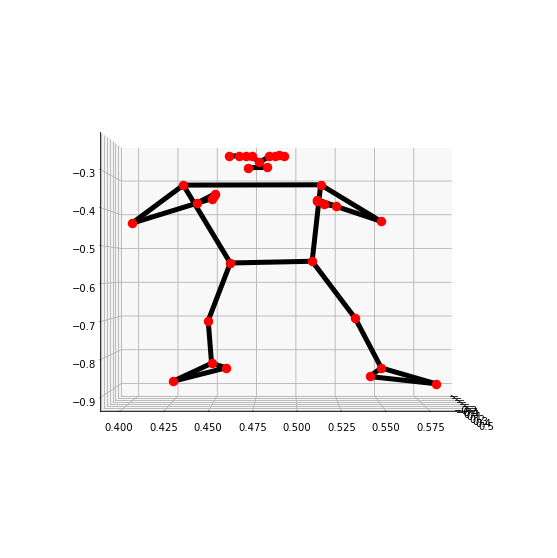

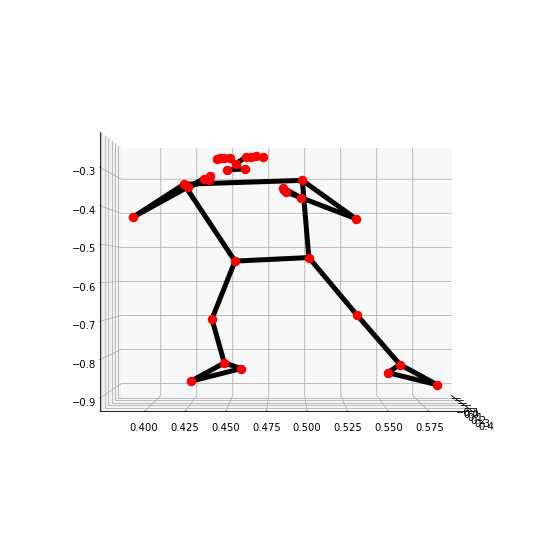

In [13]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 6

In [16]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../new/6/{}.MOV'.format(i), df[df['clip_name'] == '6_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [10, 22]
Current point: 1
Frame: 16, True angle: [86]
Current point: 2
Frame: 36, True angle: [92, 100, 83, 22]
Current point: 3
Frame: 40, True angle: [136, 118]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [12, 23]
Current point: 1
Frame: 20, True angle: [36]
Current point: 2
Frame: 28, True angle: [75, 89, 79, 11]
Current point: 3
Frame: 44, True angle: [95, 112]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [6, 20]
Current point: 1
Frame: 20, True angle: [40]
Current point: 2
Frame: 28, True angle: [81, 92, 78, 15]
Current point: 3
Frame: 44, True angle: [119, 121]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [6, 19]
Current point: 1
Frame: 16, True angle: [48]
Current point: 2
Frame: 20, True angle: [124, 98, 54, 8]
Current point: 3
Frame: 36, True angle: [123, 122]
Cur

Frame: 36, True angle: [108, 114]
Current point: 4
total point: 4
--------------------------------------------
clip 34:
Frame: 4, True angle: [11, 24]
Current point: 1
Frame: 16, True angle: [22]
Current point: 2
Frame: 20, True angle: [93, 103]
Current point: 3
total point: 3
--------------------------------------------
clip 35:
Frame: 4, True angle: [9, 25]
Current point: 1
Frame: 12, True angle: [69]
Current point: 2
Frame: 28, True angle: [103, 102, 30, 16]
Current point: 3
Frame: 40, True angle: [131, 147]
Current point: 4
total point: 4
--------------------------------------------


## 7.มอญยันหลัก

In [223]:
'''
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '12', 'true_angle': 75, 'operator': '>'},
{'step': 3, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'},
{'step': 3, 'sub_step': 2, 'main_node': '12', 'true_angle': 80, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'}])
'''

"\ntrue_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},\n{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},\n{'step': 2, 'sub_step': 1, 'main_node': '12', 'true_angle': 75, 'operator': '>'},\n{'step': 3, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'},\n{'step': 3, 'sub_step': 2, 'main_node': '12', 'true_angle': 80, 'operator': '<'},\n{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'}])\n\n\ncal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},\n{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},\n{'step': 2, 'sub_step': 1, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},\n{'step': 3, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},\n{'step': 3, 'sub_step': 2, 'begin_nod

In [8]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '12', 'true_angle': 75, 'operator': '>'},
{'step': 2, 'sub_step': 2, 'main_node': '14', 'true_angle': 130, 'operator': '>='},
{'step': 3, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'},
{'step': 3, 'sub_step': 2, 'main_node': '12', 'true_angle': 80, 'operator': '<'},
{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 15, 'operator': '<'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 2, 'sub_step': 2, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},
{'step': 3, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'}])

### Test class

In [9]:
df = pd.read_csv('../new/data/7.csv')
del df['Unnamed: 0']

In [16]:
clip_name = 12
m2 = MuayThai('../new/7/{}.MOV'.format(clip_name), df[df['clip_name'] == '7_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [17]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [10, 12]
Current point: 1
Frame: 16, True angle: [112, 144]
Current point: 2
Frame: 24, True angle: [2, 57]
Current point: 3
Frame: 28, True angle: [0]
Current point: 4


4

In [18]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [19]:
landmarks = m2.get_landmarks()

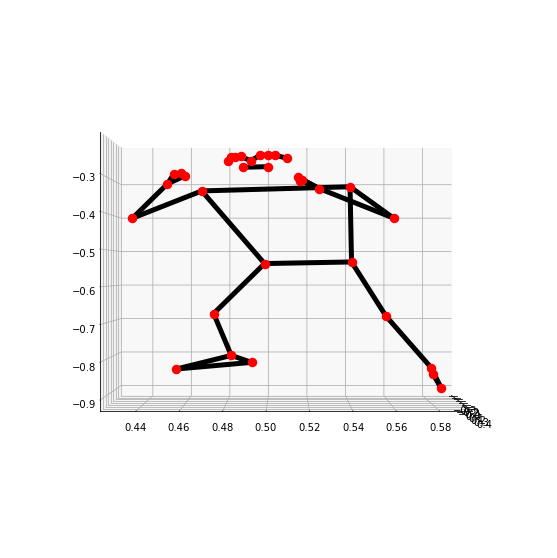

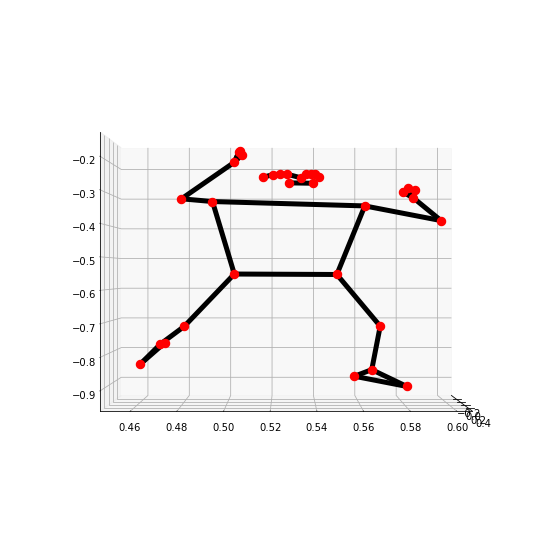

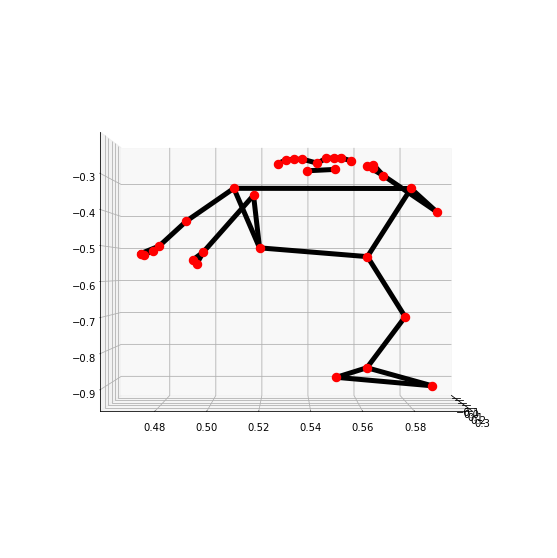

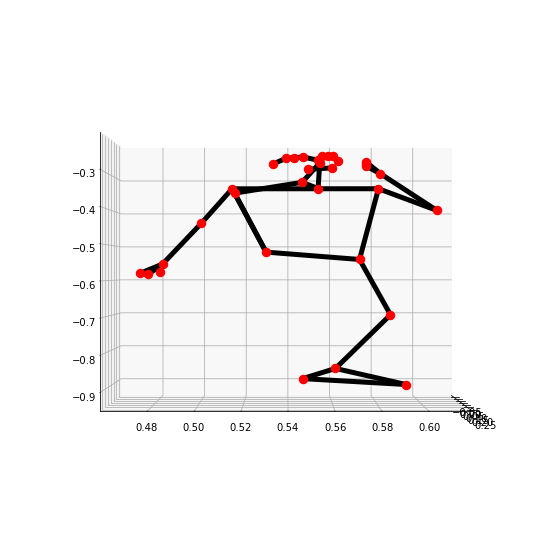

In [20]:
m2.show_true_graph(landmarks, true_step_frame_index)

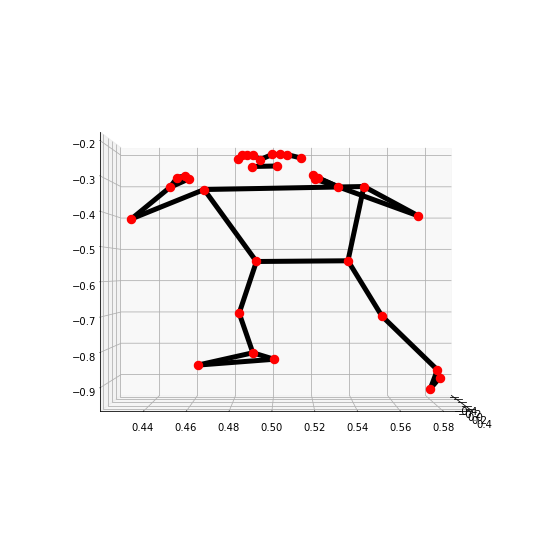

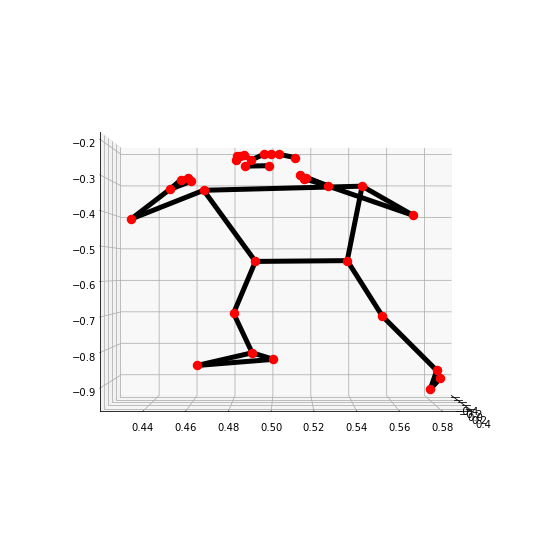

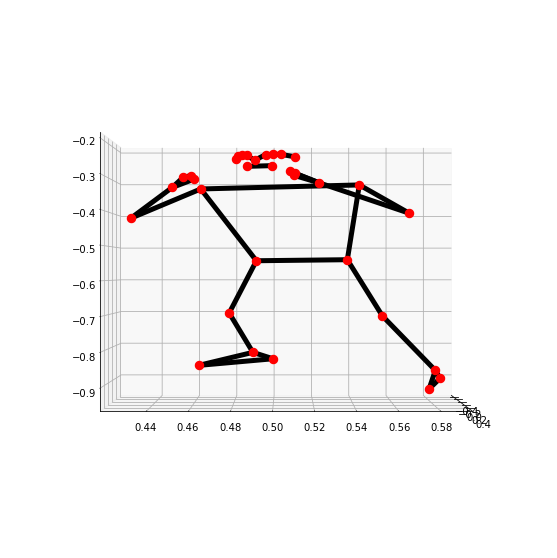

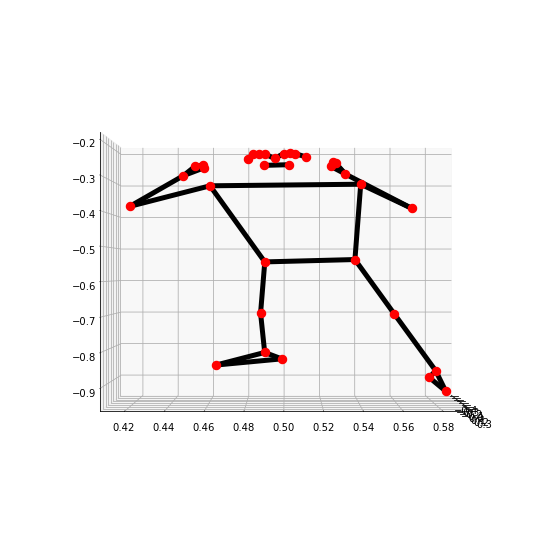

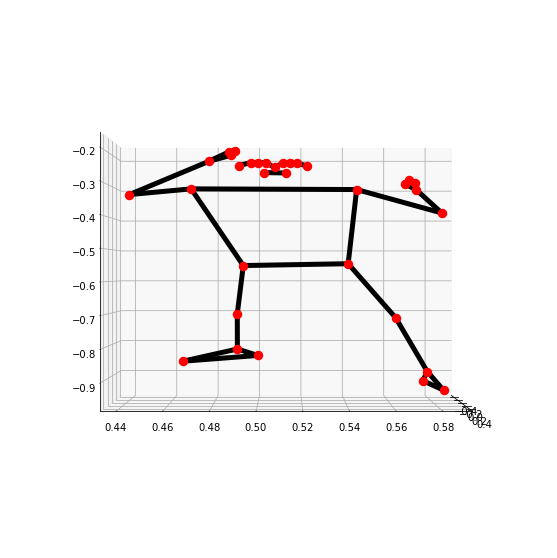

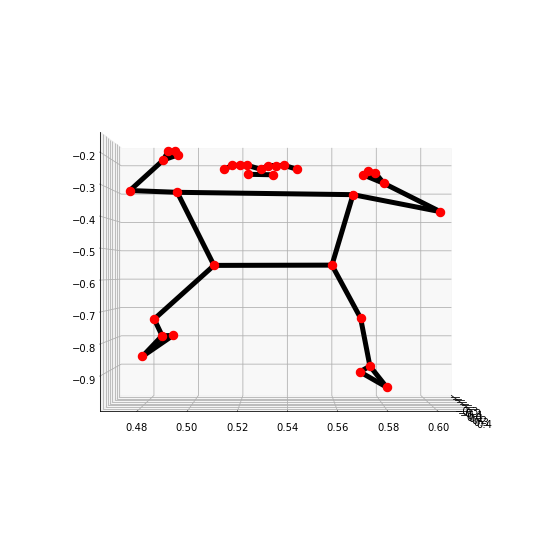

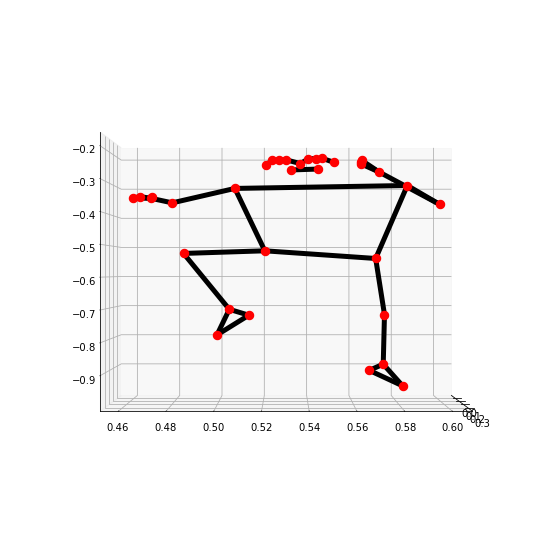

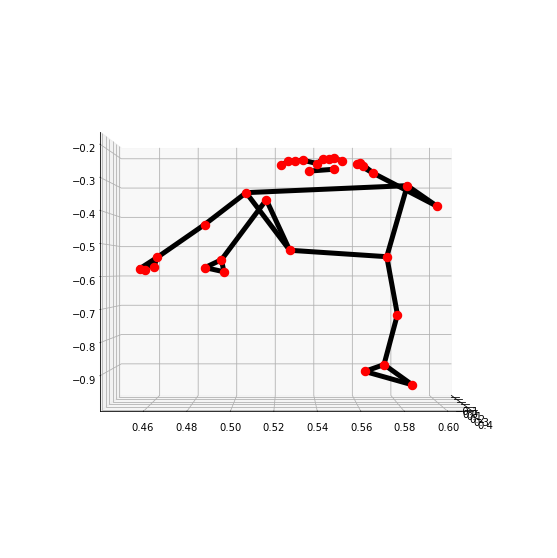

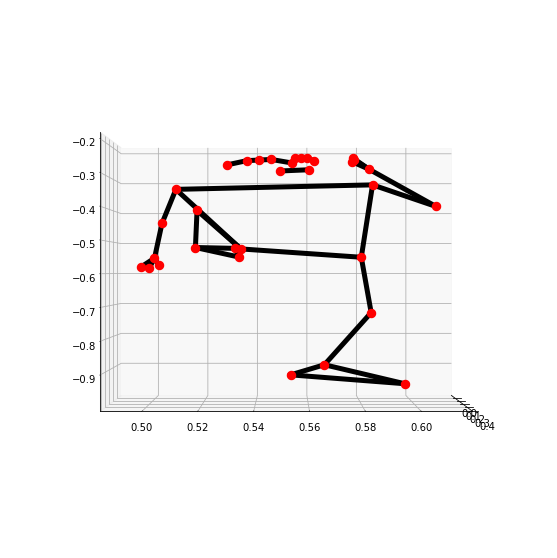

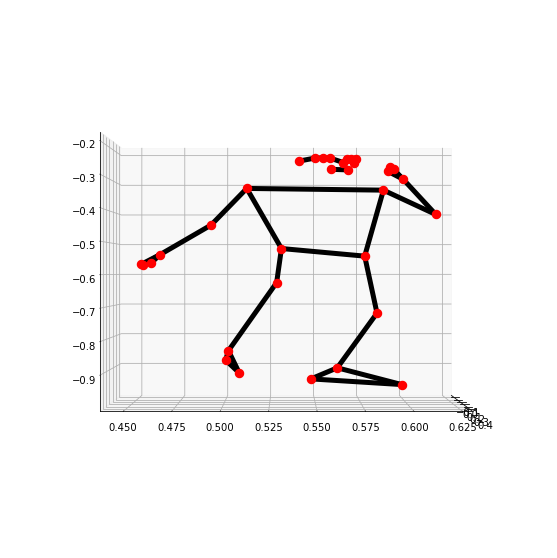

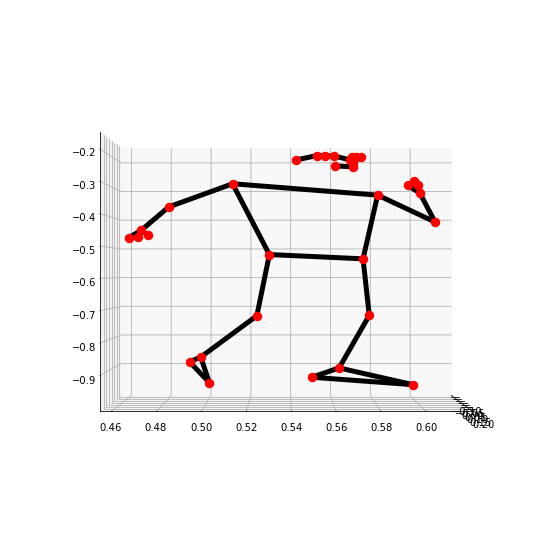

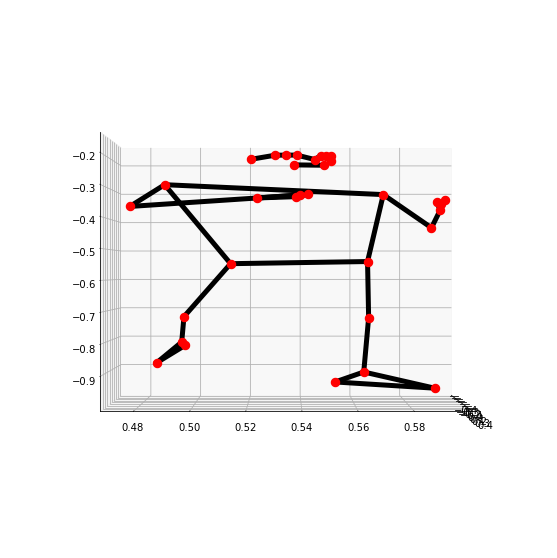

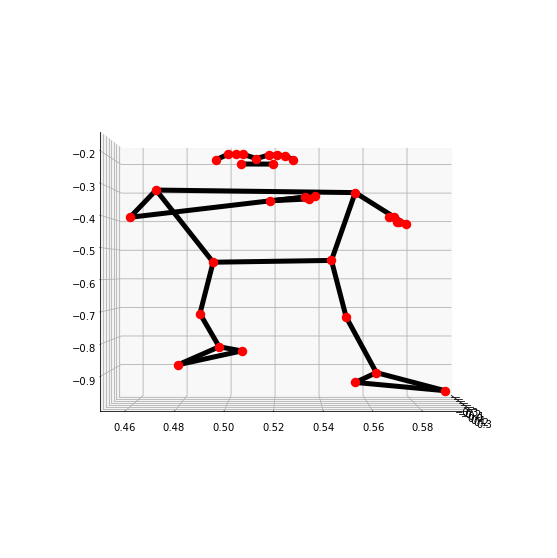

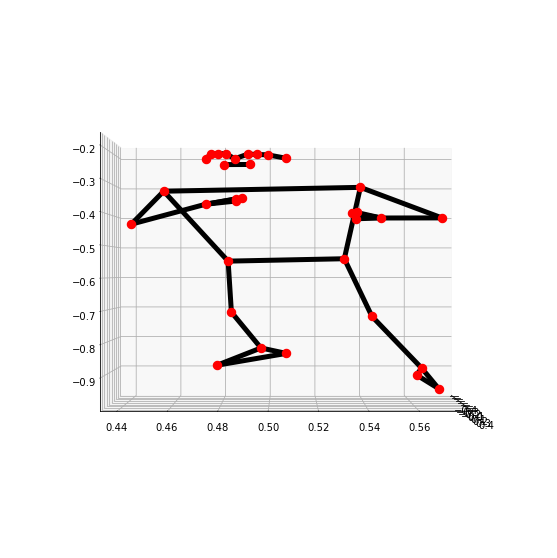

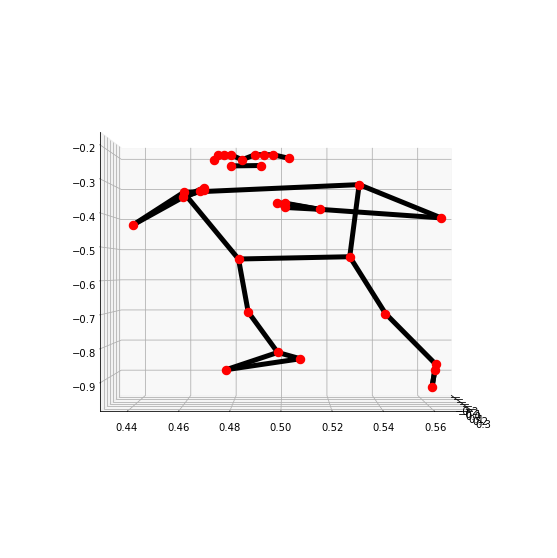

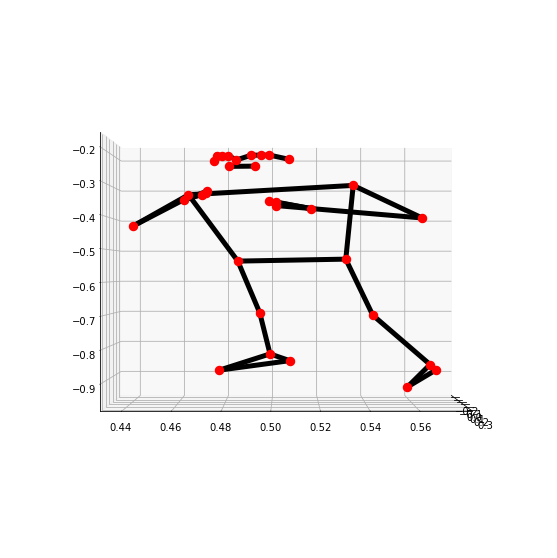

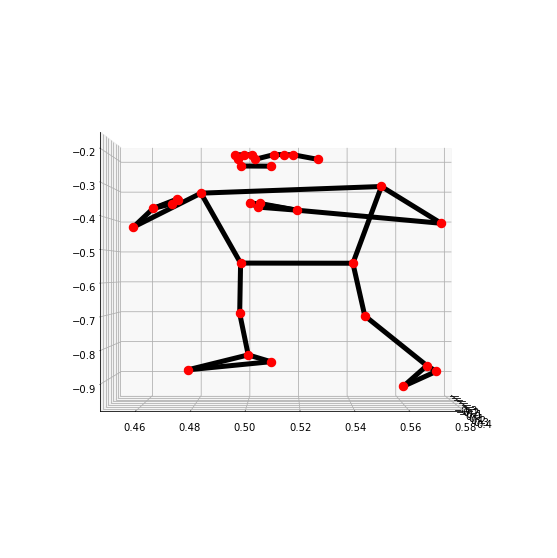

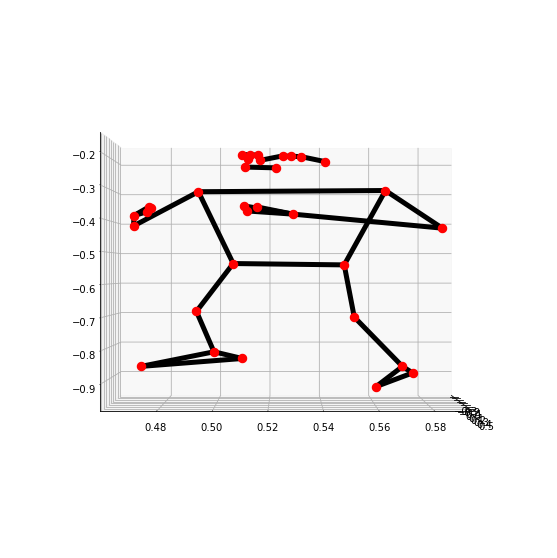

In [231]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 7

In [15]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../new/7/{}.MOV'.format(i), df[df['clip_name'] == '7_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [5, 18]
Current point: 1
Frame: 12, True angle: [102, 144]
Current point: 2
Frame: 20, True angle: [2, 60]
Current point: 3
Frame: 24, True angle: [1]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [10, 19]
Current point: 1
Frame: 12, True angle: [77, 133]
Current point: 2
Frame: 20, True angle: [1, 51]
Current point: 3
Frame: 24, True angle: [2]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [9, 14]
Current point: 1
Frame: 12, True angle: [108, 146]
Current point: 2
Frame: 20, True angle: [7, 74]
Current point: 3
Frame: 24, True angle: [12]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [13, 16]
Current point: 1
Frame: 12, True angle: [90, 136]
Current point: 2
Frame: 20, True angle: [3, 61]
Current point: 3
Frame: 24, True angle: [3]
Current point: 4
total point: 4
------------

Frame: 4, True angle: [3, 21]
Current point: 1
Frame: 16, True angle: [91, 144]
Current point: 2
Frame: 24, True angle: [0, 44]
Current point: 3
Frame: 28, True angle: [4]
Current point: 4
total point: 4
--------------------------------------------
clip 35:
Frame: 4, True angle: [6, 16]
Current point: 1
Frame: 16, True angle: [92, 148]
Current point: 2
Frame: 20, True angle: [0, 2]
Current point: 3
Frame: 24, True angle: [0]
Current point: 4
total point: 4
--------------------------------------------


## 13.ดับชวาลา

In [578]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'}])

cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'}])

### Test class

In [586]:
df = pd.read_csv('../new/data/13.csv')
del df['Unnamed: 0']

In [587]:
clip_name = 1
m2 = MuayThai('../new/13/{}.MOV'.format(clip_name), df[df['clip_name'] == '13_{}'.format(clip_name)], 1, true_steps, cal_steps)

In [588]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [5, 22]
Current point: 1
[[5, 22]]


1

## 15. หักคอเอราวัณ

In [4]:
true_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '<'},
{'step': 1, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '<'},
{'step': 2, 'sub_step': 1, 'main_node': '14', 'true_angle': 90, 'operator': '>'},
{'step': 2, 'sub_step': 2, 'main_node': '12', 'true_angle': 90, 'operator': '>'},
{'step': 2, 'sub_step': 3, 'main_node': '23', 'true_angle': 90, 'operator': '<'},
{'step': 3, 'sub_step': 1, 'main_node': '11', 'true_angle': 90, 'operator': '>'},
{'step': 3, 'sub_step': 2, 'main_node': '13', 'true_angle': 90, 'operator': '>'},
{'step': 4, 'sub_step': 1, 'main_node': '24', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 2, 'main_node': '26', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 3, 'main_node': '12', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 4, 'main_node': '11', 'true_angle': 90, 'operator': '<'},
{'step': 4, 'sub_step': 5, 'main_node': '14', 'true_angle': 100, 'operator': '<'},
{'step': 4, 'sub_step': 6, 'main_node': '13', 'true_angle': 90, 'operator': '<'}])


cal_steps = pd.DataFrame([{'step': 1, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'xy'},
{'step': 1, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'},
{'step': 2, 'sub_step': 1, 'begin_node': '12', 'main_node': '14', 'end_node': '16' , 'axis': 'yz'},
{'step': 2, 'sub_step': 2, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'yz'},
{'step': 2, 'sub_step': 3, 'begin_node': '24', 'main_node': '23', 'end_node': '25' , 'axis': 'yz'},
{'step': 3, 'sub_step': 1, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'yz'},
{'step': 3, 'sub_step': 2, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'yz'},
{'step': 4, 'sub_step': 1, 'begin_node': '12', 'main_node': '24', 'end_node': '26' , 'axis': 'xy'},
{'step': 4, 'sub_step': 2, 'begin_node': '24', 'main_node': '26', 'end_node': '28' , 'axis': 'yz'},
{'step': 4, 'sub_step': 3, 'begin_node': '14', 'main_node': '12', 'end_node': '24' , 'axis': 'xy'},
{'step': 4, 'sub_step': 4, 'begin_node': '13', 'main_node': '11', 'end_node': '23' , 'axis': 'xy'},
{'step': 4, 'sub_step': 5, 'begin_node': '12', 'main_node': '14', 'end_node': '22' , 'axis': 'xy'},
{'step': 4, 'sub_step': 6, 'begin_node': '11', 'main_node': '13', 'end_node': '15' , 'axis': 'xy'}])

### Test class

In [5]:
df = pd.read_csv('../new/data/15.csv')
del df['Unnamed: 0']

In [13]:
clip_name = 15
m2 = MuayThai('../new/15/{}.MOV'.format(clip_name), df[df['clip_name'] == '15_{}'.format(clip_name)], 4, true_steps, cal_steps)

In [14]:
point, true_step_frame = m2.check()
point

Frame: 4, True angle: [6, 14]
Current point: 1
Frame: 12, True angle: [147, 116, 54]
Current point: 2
Frame: 20, True angle: [111, 156]
Current point: 3
Frame: 28, True angle: [7, 56, 15, 6, 98, 75]
Current point: 4


4

In [15]:
true_step_frame_index = list((np.array(true_step_frame)/4-1).astype(int))

In [16]:
landmarks = m2.get_landmarks()

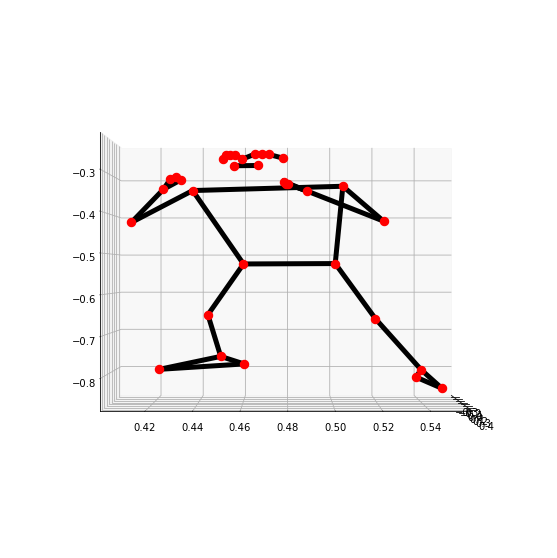

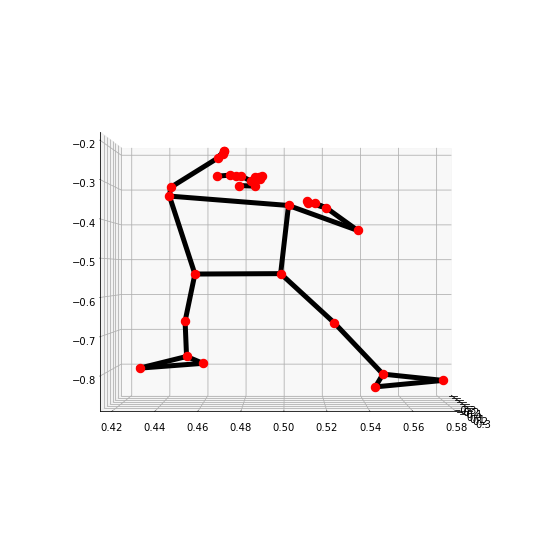

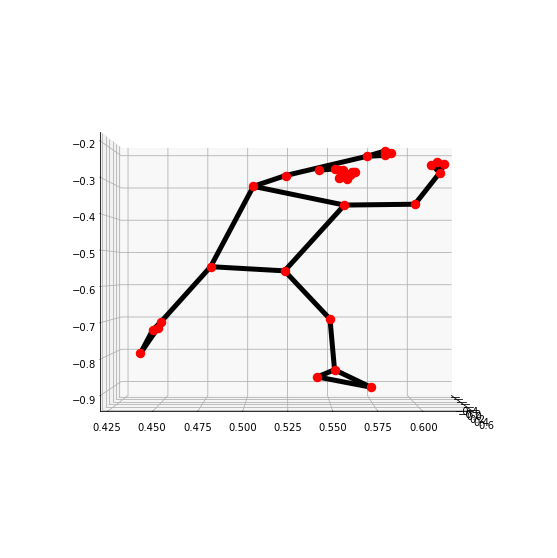

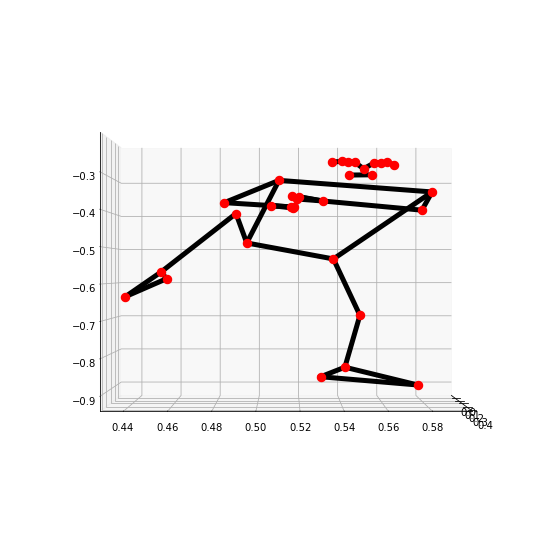

In [17]:
m2.show_true_graph(landmarks, true_step_frame_index)

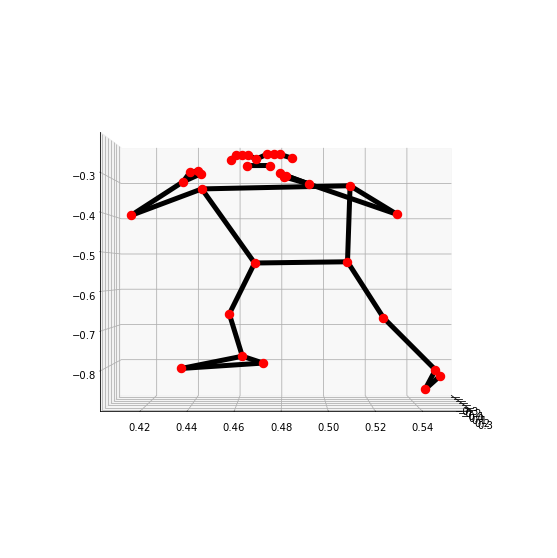

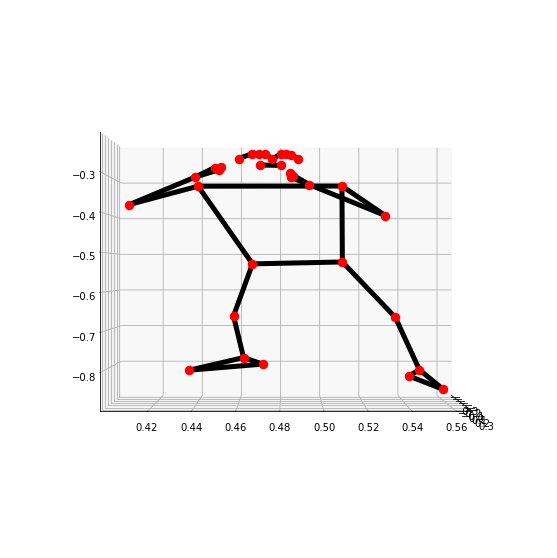

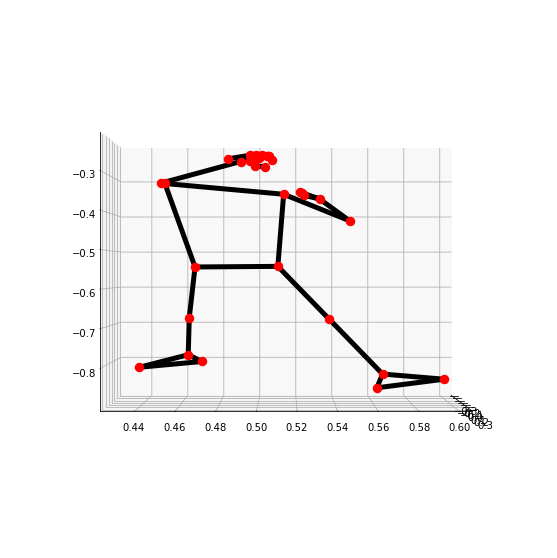

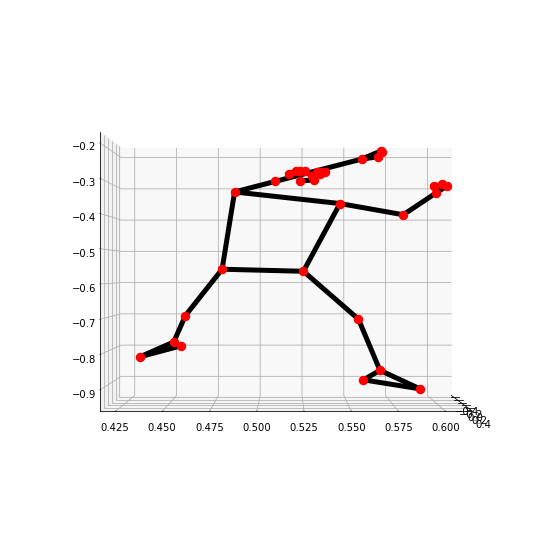

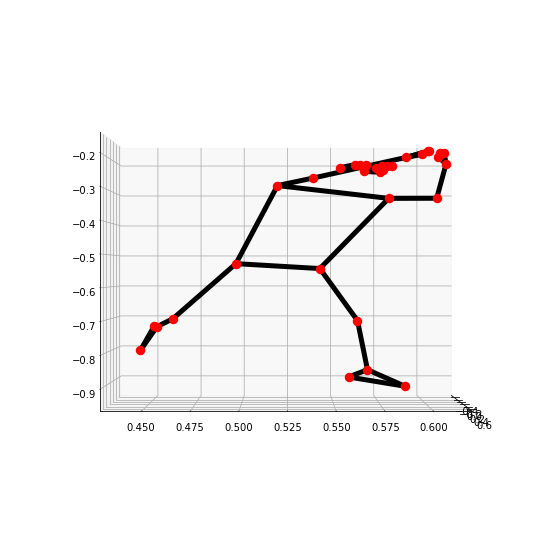

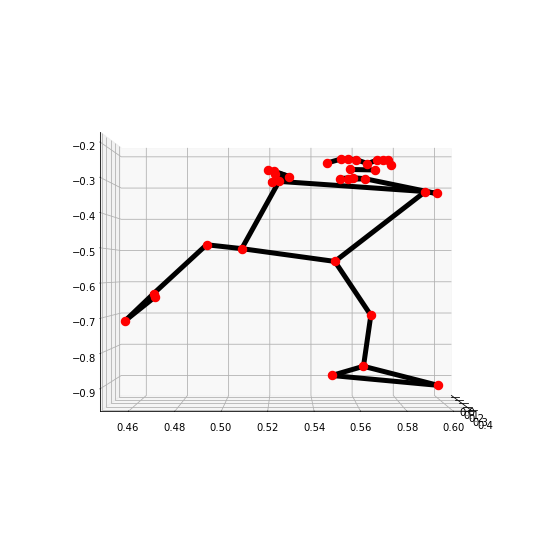

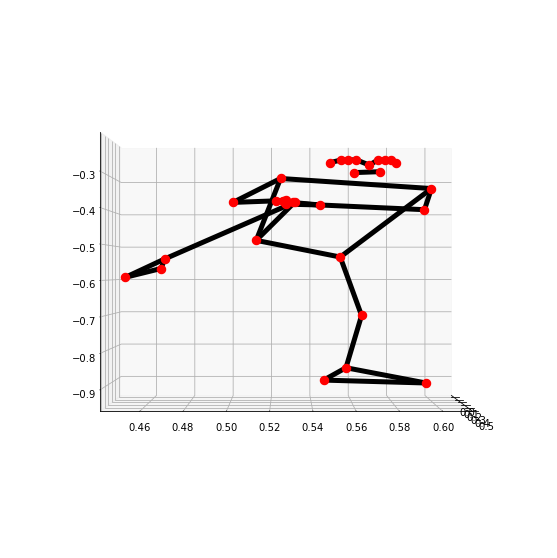

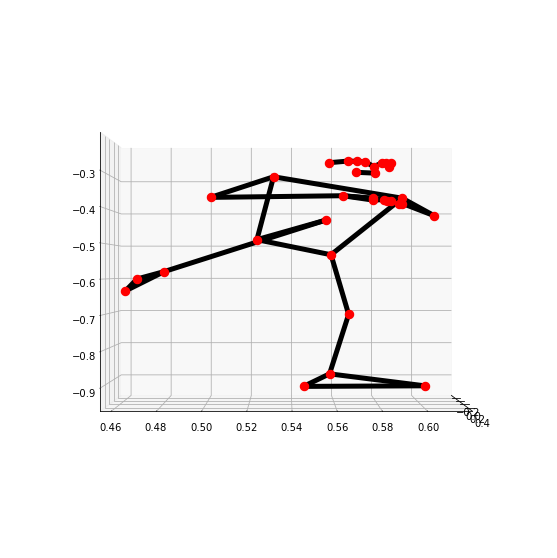

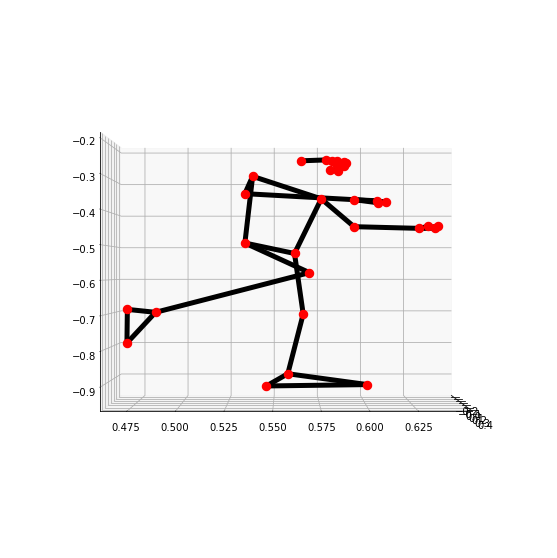

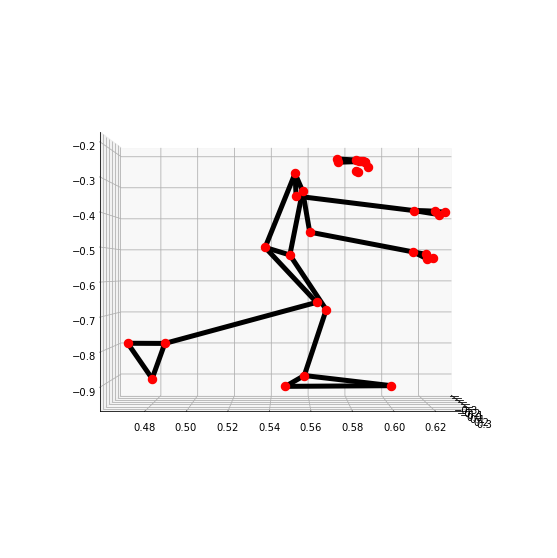

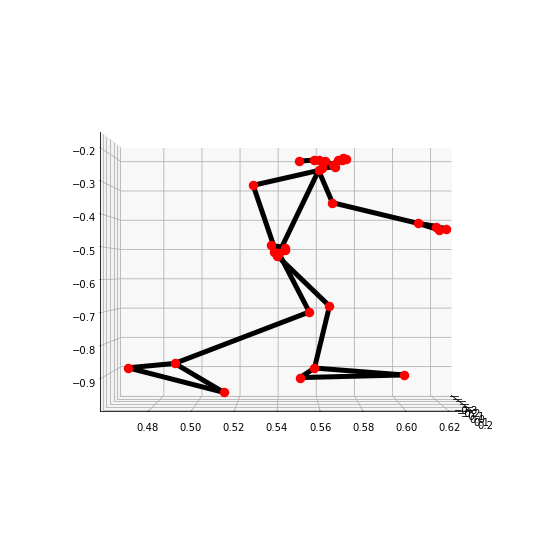

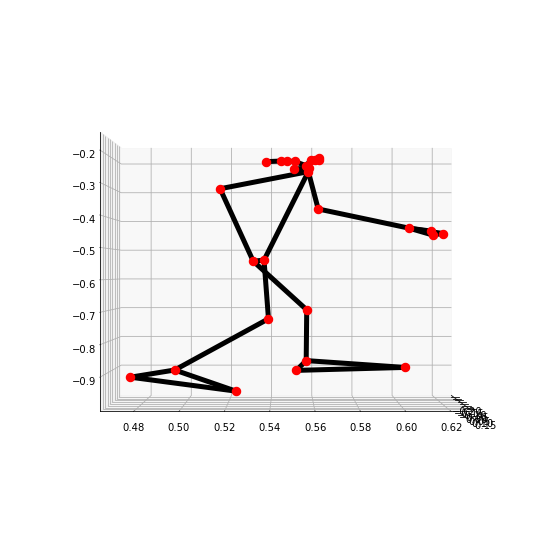

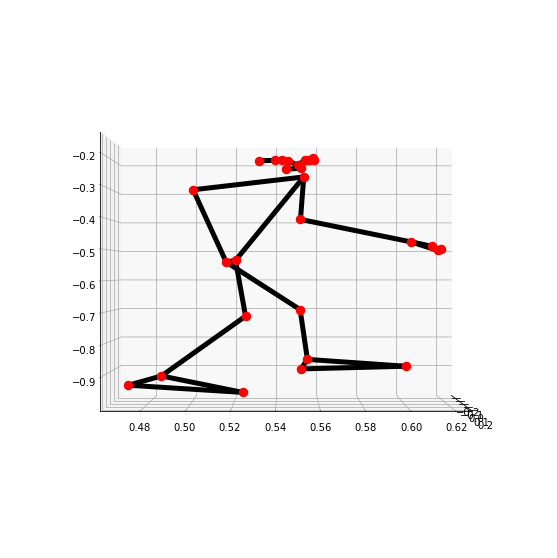

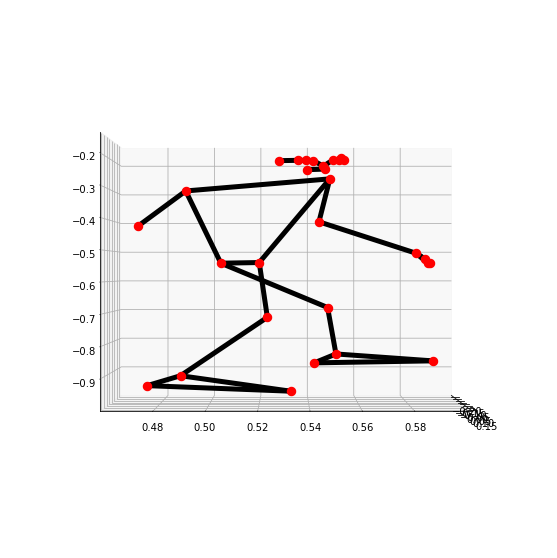

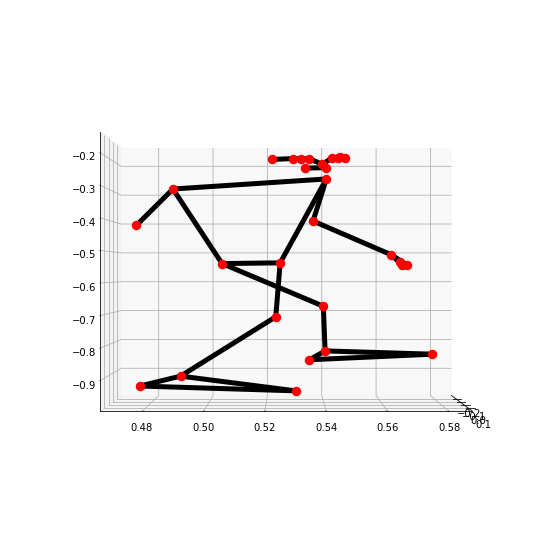

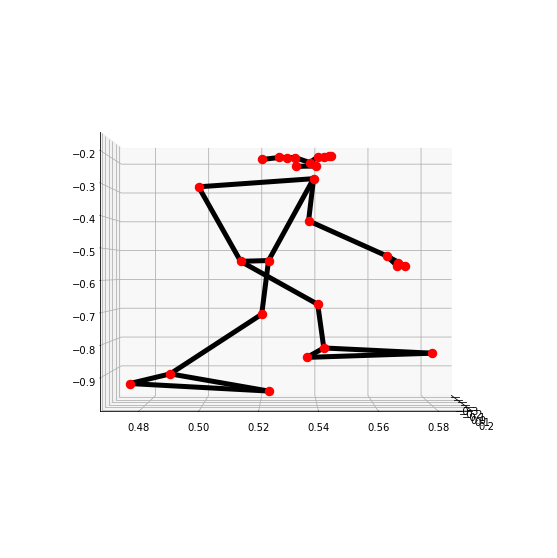

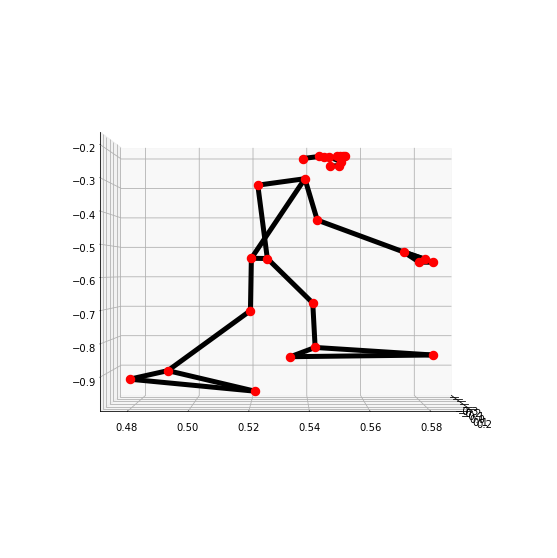

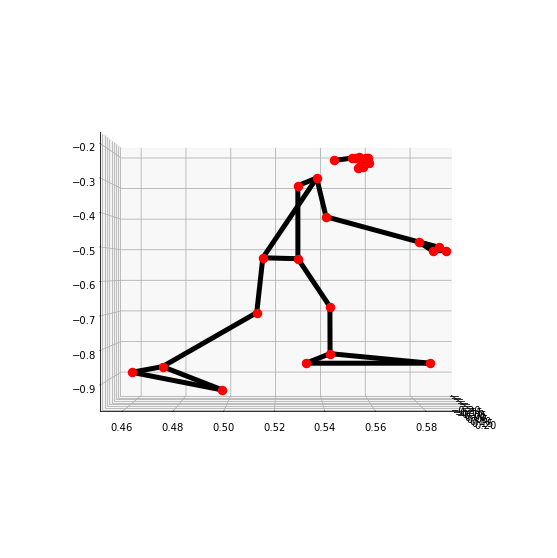

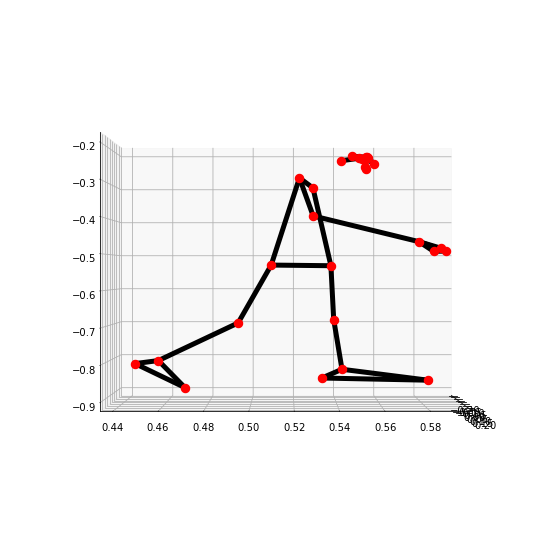

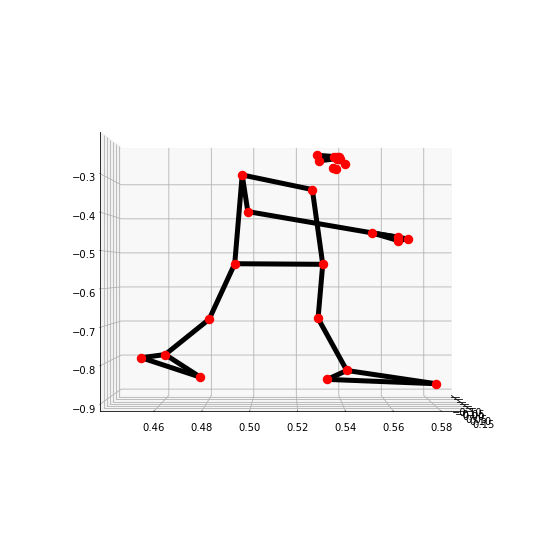

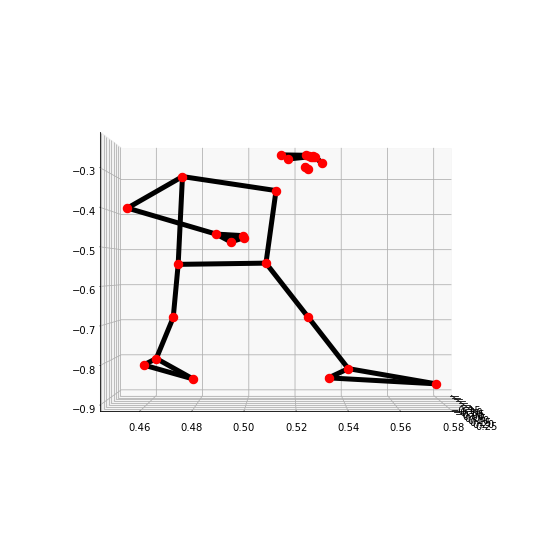

In [224]:
for i in range(len(landmarks)):
    mp_drawing.plot_landmarks(landmarks[i].pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation=0, azimuth=0)

### Report of 15

In [11]:
for i in range(1, 36):
    print('clip {}:'.format(i))
    m = MuayThai('../new/15/{}.MOV'.format(i), df[df['clip_name'] == '15_{}'.format(i)], 4, true_steps, cal_steps)
    point, true_step_frame = m.check()
    print('total point: {}'.format(point))
    print('--------------------------------------------')

clip 1:
Frame: 4, True angle: [7, 11]
Current point: 1
Frame: 20, True angle: [149, 123, 41]
Current point: 2
Frame: 28, True angle: [106, 154]
Current point: 3
Frame: 36, True angle: [24, 71, 18, 9, 82, 15]
Current point: 4
total point: 4
--------------------------------------------
clip 2:
Frame: 4, True angle: [3, 12]
Current point: 1
Frame: 24, True angle: [161, 109, 47]
Current point: 2
Frame: 28, True angle: [95, 155]
Current point: 3
Frame: 40, True angle: [5, 72, 24, 14, 55, 49]
Current point: 4
total point: 4
--------------------------------------------
clip 3:
Frame: 4, True angle: [4, 15]
Current point: 1
Frame: 20, True angle: [107, 131, 70]
Current point: 2
Frame: 24, True angle: [93, 151]
Current point: 3
Frame: 36, True angle: [12, 63, 13, 9, 89, 47]
Current point: 4
total point: 4
--------------------------------------------
clip 4:
Frame: 4, True angle: [3, 15]
Current point: 1
Frame: 20, True angle: [141, 99, 6]
Current point: 2
Frame: 28, True angle: [91, 148]
Curren

Frame: 16, True angle: [158, 112, 87]
Current point: 2
Frame: 24, True angle: [102, 154]
Current point: 3
Frame: 32, True angle: [1, 71, 0, 10, 73, 68]
Current point: 4
total point: 4
--------------------------------------------
clip 32:
Frame: 4, True angle: [5, 19]
Current point: 1
Frame: 16, True angle: [147, 126, 70]
Current point: 2
Frame: 20, True angle: [111, 158]
Current point: 3
Frame: 32, True angle: [16, 78, 17, 17, 74, 58]
Current point: 4
total point: 4
--------------------------------------------
clip 33:
Frame: 4, True angle: [3, 12]
Current point: 1
Frame: 20, True angle: [147, 130, 61]
Current point: 2
Frame: 28, True angle: [109, 158]
Current point: 3
Frame: 44, True angle: [13, 53, 17, 15, 71, 63]
Current point: 4
total point: 4
--------------------------------------------
clip 34:
Frame: 4, True angle: [4, 19]
Current point: 1
Frame: 16, True angle: [119, 116, 59]
Current point: 2
Frame: 24, True angle: [118, 158]
Current point: 3
Frame: 32, True angle: [13, 55, 14,